In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import datetime
from scipy import stats

In [2]:
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 

In [3]:
#Read in ground data

df_merged = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\GOES-16_ABI_data\merged_datasets.csv')
df_merged.set_index(pd.to_datetime(df_merged.datetime), inplace=True)

In [4]:
tcc20_mean_g16 = [0.19133497, 0.131049888, 0.271328671, 0.319058977, 0.317577706, 0.448319376]
tcc20_mean_g17 = [0.124487004, 0.164508393, 0.489817052, 0.526726313, 0.378679694, 0.357195391, 0.446153846]

In [5]:
path = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\\'

In [6]:
# GOES-16 timeseries filepaths

pixelA_g16_lst = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelA_g16_rad = pd.read_csv(path + 'pixelA_GOES-16_ABI_2020_02_07-14_R.csv')

pixelB_g16_lst = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelB_g16_rad = pd.read_csv(path + 'pixelB_GOES-16_ABI_2020_02_07-14_R.csv')

pixelC_g16_rad = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_07-14_R.csv')
pixelC_g16_lst = pd.read_csv(path + 'pixelC_GOES-16_ABI_2020_02_01-15_LST.csv')

pixelD_g16_lst = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelD_g16_rad = pd.read_csv(path + 'pixelD_GOES-16_ABI_2020_02_07-14_R.csv')

pixelE_g16_lst = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelE_g16_rad = pd.read_csv(path + 'pixelE_GOES-16_ABI_2020_02_07-14_R.csv')

pixelNW_g16_lst = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_01-15_LST.csv')
pixelNW_g16_rad = pd.read_csv(path + 'pixelNW_GOES-16_ABI_2020_02_07-14_R.csv')

# GOES-17 timeseries filepaths

pixelA_g17_lst = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelA_g17_rad = pd.read_csv(path + 'pixelA_GOES-17_ABI_2020_02_01-15_R.csv')

pixelB_g17_lst = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelB_g17_rad = pd.read_csv(path + 'pixelB_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC1_g17_lst = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelC1_g17_rad = pd.read_csv(path + 'pixelC1_GOES-17_ABI_2020_02_01-15_R.csv')

pixelC2_g17_rad = pd.read_csv(path + 'pixelC2_GOES-17_ABI_02_01-15_R.csv')
pixelC2_g17_lst = pd.read_csv(path + 'pixelC2_GOES-17_ABI_2020_02_01-15_LST.csv')

pixelD_g17_lst = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelD_g17_rad = pd.read_csv(path + 'pixelD_GOES-17_ABI_2020_02_01-15_R.csv')

pixelE_g17_lst = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelE_g17_rad = pd.read_csv(path + 'pixelE_GOES-17_ABI_2020_02_01-15_R.csv')

pixelNW_g17_lst = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_LST.csv')
pixelNW_g17_rad = pd.read_csv(path + 'pixelNW_GOES-17_ABI_2020_02_01-15_R.csv')

In [7]:
df_list = [pixelA_g16_lst ,pixelA_g16_rad,pixelB_g16_lst,pixelB_g16_rad,pixelC_g16_rad,pixelC_g16_lst,pixelD_g16_lst,pixelD_g16_rad,pixelE_g16_lst,pixelE_g16_rad,pixelNW_g16_lst,pixelNW_g16_rad,pixelA_g17_lst,pixelA_g17_rad,pixelB_g17_lst,pixelB_g17_rad,pixelC1_g17_lst,pixelC1_g17_rad,pixelC2_g17_rad,pixelC2_g17_lst,pixelD_g17_lst,pixelD_g17_rad,pixelE_g17_lst,pixelE_g17_rad,pixelNW_g17_lst,pixelNW_g17_rad]

for df in df_list:
    if 't' in df.columns:
        df['datetime'] = pd.to_datetime(df.t)
    elif 'time' in df.columns:
        df['datetime'] = pd.to_datetime(df.time)
    df.set_index('datetime', inplace=True)

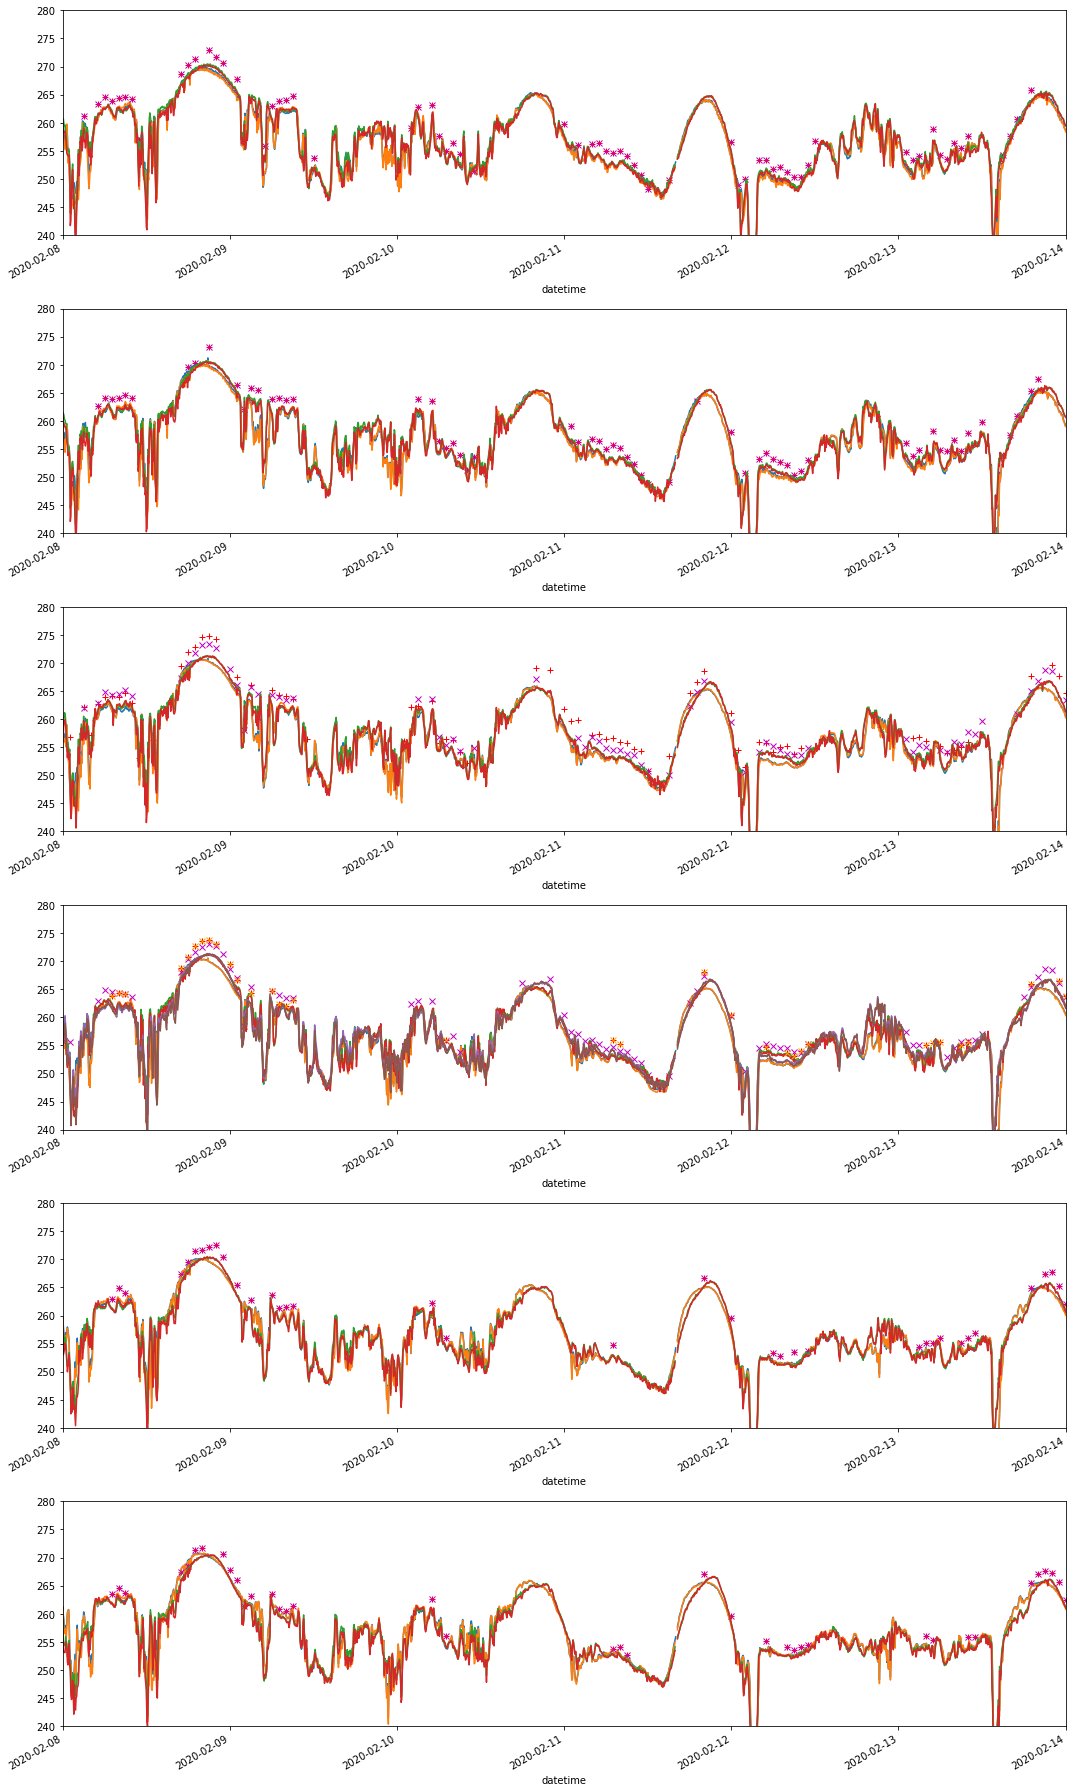

In [8]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=6, ncols= 1, figsize=(15,25), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axNW)
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW)
pixelNW_g16_rad.b14_tb_2km.plot(ax=axNW)

# GOES-17
pixelNW_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axNW)
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW)
pixelNW_g17_rad.b14_tb_2km.plot(ax=axNW)

### Pixel A

# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA)
pixelA_g16_rad.b13_tb_2km.plot(ax=axA)
pixelA_g16_rad.b14_tb_2km.plot(ax=axA)

# GOES-17
pixelA_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axA)
pixelA_g17_rad.b13_tb_2km.plot(ax=axA)
pixelA_g17_rad.b14_tb_2km.plot(ax=axA)

### Pixel B

# GOES-16
pixelB_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axB)
pixelB_g16_rad.b13_tb_2km.plot(ax=axB)
pixelB_g16_rad.b14_tb_2km.plot(ax=axB)

# GOES-17
pixelB_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axB)
pixelB_g17_rad.b13_tb_2km.plot(ax=axB)
pixelB_g17_rad.b14_tb_2km.plot(ax=axB)

### Pixel C

# GOES-16
pixelC_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axC)
pixelC_g16_rad.b13_tb_2km.plot(ax=axC)
pixelC_g16_rad.b14_tb_2km.plot(ax=axC)

# GOES-17
pixelC1_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axC)
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC)
pixelC1_g17_rad.b14_tb_2km.plot(ax=axC)

pixelC2_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='orange', ax=axC)
pixelC2_g17_rad.b13_tb_2km.plot(ax=axC)
pixelC2_g17_rad.b14_tb_2km.plot(ax=axC)

### Pixel D

# GOES-16
pixelD_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axD)
pixelD_g16_rad.b13_tb_2km.plot(ax=axD)
pixelD_g16_rad.b14_tb_2km.plot(ax=axD)

# GOES-17
pixelD_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axD)
pixelD_g17_rad.b13_tb_2km.plot(ax=axD)
pixelD_g17_rad.b14_tb_2km.plot(ax=axD)

### Pixel E

# GOES-16
pixelE_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axE)
pixelE_g16_rad.b13_tb_2km.plot(ax=axE)
pixelE_g16_rad.b14_tb_2km.plot(ax=axE)

# GOES-17
pixelE_g17_lst.LST.plot(marker = 'x', linestyle='none',  color='m', ax=axE)
pixelE_g17_rad.b13_tb_2km.plot(ax=axE)
pixelE_g17_rad.b14_tb_2km.plot(ax=axE)

# formatting
for this_ax in axs.ravel():
    this_ax.set_xlim(pd.Timestamp('2020-02-08'), pd.Timestamp('2020-02-14'))
    this_ax.set_ylim(240,280)

---
goes 16 vs goes 17

In [9]:
def make_g16_g17_plot(g16df, g17df, band_tb, startdate, enddate, axmin=240, axmax=275, xlabel = 'x', ylabel = 'y', title = 'GOES-17 - GOES-16'):
    
    plt.figure(figsize=(4,4),tight_layout=True)
    
    x = g16df[band_tb][startdate:enddate][g16df[startdate:enddate].index.isin(g17df[startdate:enddate].index)]
    y = g17df[band_tb][startdate:enddate]
    
    plt.plot(x, y,'.')
    plt.plot([axmin,axmax],[axmin,axmax],'-k', zorder=-999)
    plt.xlim(axmin,axmax)
    plt.ylim(axmin,axmax)
    
    stats_dict = summary_stats(x, y)
    s1 = str(np.round(stats_dict['r_squared'],2))
    s2 = str(np.round(stats_dict['mean_diff'],2))
    s3 = str(np.round(stats_dict['rms_diff'],2))
    text_x, text_y = axmin+2, axmax-8
    plt.text(text_x, text_y, f'$T_B$\nmean diff = {s2}\nRMSE = {s3}', fontsize=12)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    
    return plt, stats_dict

Feb 8

Band 14

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  x = g16df[band_tb][startdate:enddate][g16df[startdate:enddate].index.isin(g17df[startdate:enddate].index)]
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y = g17df[band_tb][startdate:enddate]


0.7078091454884383
0.4404635999936824
1.8054155622209822


Text(0.5, 1.0, '2020-02-08 19:00 - 2020-02-09 00\n0.2564426412622427\n0.35830494147617\n0.6131319721813854\n0.1431744054830619')

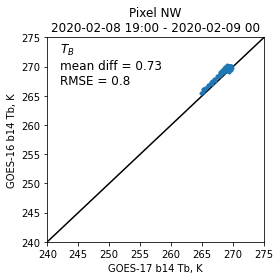

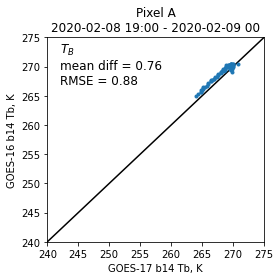

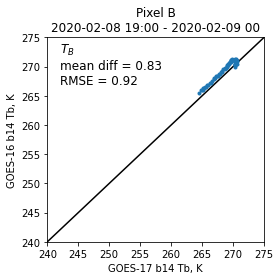

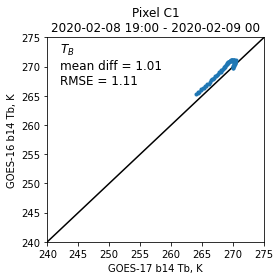

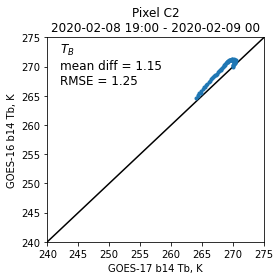

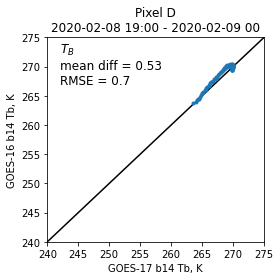

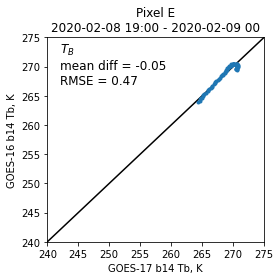

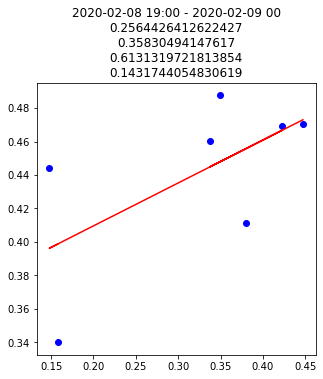

In [10]:
startdate, enddate = '2020-02-08 19:00', '2020-02-09 00'

plt, stats_dict_NW = make_g16_g17_plot(pixelNW_g16_rad, 
                                    pixelNW_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel NW\n{startdate} - {enddate}')

plt, stats_dict_A = make_g16_g17_plot(pixelA_g16_rad, 
                                    pixelA_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel A\n{startdate} - {enddate}')

plt, stats_dict_B = make_g16_g17_plot(pixelB_g16_rad, 
                                    pixelB_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel B\n{startdate} - {enddate}')

plt, stats_dict_C1 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC1_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel C1\n{startdate} - {enddate}')

plt, stats_dict_C2 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC2_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel C2\n{startdate} - {enddate}')

plt, stats_dict_D = make_g16_g17_plot(pixelD_g16_rad, 
                                    pixelD_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel D\n{startdate} - {enddate}')

plt, stats_dict_E = make_g16_g17_plot(pixelE_g16_rad, 
                                    pixelE_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel E\n{startdate} - {enddate}')



tccNW_avg = (tcc20_mean_g16[0] + tcc20_mean_g17[0]) / 2
tccA_avg = (tcc20_mean_g16[1] + tcc20_mean_g17[1]) / 2
tccB_avg = (tcc20_mean_g16[2] + tcc20_mean_g17[2]) / 2
tccC1_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[3]) / 2
tccC2_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[4]) / 2
tccD_avg = (tcc20_mean_g16[4] + tcc20_mean_g17[5]) / 2
tccE_avg = (tcc20_mean_g16[5] + tcc20_mean_g17[6]) / 2

tcc_avg = [tccNW_avg, tccA_avg, tccB_avg, tccC1_avg, tccC2_avg, tccD_avg, tccE_avg]
mean_diffs = [stats_dict_NW['mean_diff'], stats_dict_A['mean_diff'], stats_dict_B['mean_diff'], stats_dict_C1['mean_diff'], stats_dict_C2['mean_diff'], stats_dict_D['mean_diff'], stats_dict_E['mean_diff']]
std_diffs = [stats_dict_NW['std_diff'], stats_dict_A['std_diff'], stats_dict_B['std_diff'], stats_dict_C1['std_diff'], stats_dict_C2['std_diff'], stats_dict_D['std_diff'], stats_dict_E['std_diff']]
max_diffs = [stats_dict_NW['min_diff'], stats_dict_A['min_diff'], stats_dict_B['min_diff'], stats_dict_C1['min_diff'], stats_dict_C2['min_diff'], stats_dict_D['min_diff'], stats_dict_E['min_diff']]
range_diffs = [stats_dict_NW['range_diff'], stats_dict_A['range_diff'], stats_dict_B['range_diff'], stats_dict_C1['range_diff'], stats_dict_C2['range_diff'], stats_dict_D['range_diff'], stats_dict_E['range_diff']]


print(np.mean(np.array(mean_diffs)))
print(np.mean(np.array(std_diffs)))
print(np.mean(np.array(range_diffs)))

plt.figure(figsize=(5,5))
#plt.plot(tcc_avg, mean_diffs, 'o')
plt.plot(tcc_avg, std_diffs, 'ob')
#plt.plot(tcc_avg, max_diffs, 'o')
slope, intercept, r, p, se = stats.linregress(tcc_avg, std_diffs)
plt.plot(tcc_avg, np.array(tcc_avg)*slope + intercept, '-r')
plt.title(f'{startdate} - {enddate}\n{slope}\n{intercept}\n{r}\n{p}')

Text(0.5, 1.0, 'GOES-16 - GOES-17, Pixel E\n2020-02-08 14 - 2020-02-09 00')

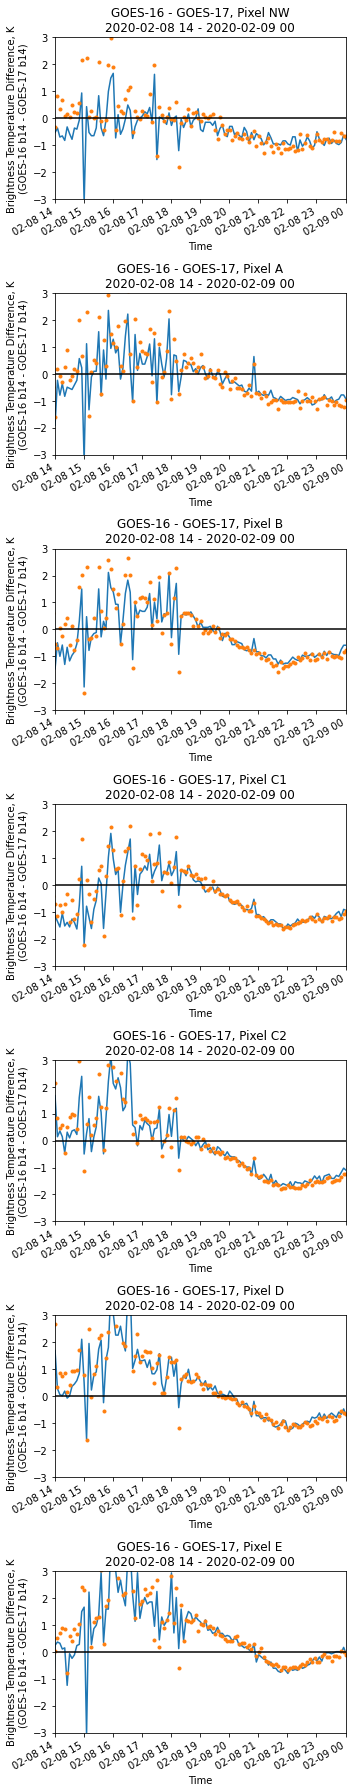

In [11]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=7, ncols= 1, figsize=(5,25), tight_layout=True)

[axNW, axA, axB, axC1, axC2, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16 - GOES-17
#(pixelNW_g16_lst.LST -        pixelNW_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axNW)
(pixelNW_g16_rad.b13_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(ax=axNW)
(pixelNW_g16_rad.b14_tb_2km - pixelNW_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axNW)

### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b14_tb_2km - pixelA_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axA)

### Pixel B

# GOES-16 - GOES-17
#(pixelB_g16_lst.LST -        pixelB_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axB)
(pixelB_g16_rad.b13_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(ax=axB)
(pixelB_g16_rad.b14_tb_2km - pixelB_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axB)

### Pixel C

# GOES-16 - GOES-17 C1
#(pixelC_g16_lst.LST -        pixelC1_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
(pixelC_g16_rad.b13_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(ax=axC1)
(pixelC_g16_rad.b14_tb_2km - pixelC1_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC1)
# GOES-16 - GOES-17 C2
#(pixelC_g16_lst.LST -        pixelC2_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
(pixelC_g16_rad.b13_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(ax=axC2)
(pixelC_g16_rad.b14_tb_2km - pixelC2_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC2)

### Pixel D

# GOES-16 - GOES-17
#(pixelD_g16_lst.LST -        pixelD_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axD)
(pixelD_g16_rad.b13_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(ax=axD)
(pixelD_g16_rad.b14_tb_2km - pixelD_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axD)

### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b14_tb_2km - pixelE_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axE)

starttime, endtime = '2020-02-08 14', '2020-02-09 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-3,3)
    this_ax.set_ylabel('Brightness Temperature Difference, K\n(GOES-16 b14 - GOES-17 b14)')
    this_ax.set_xlabel('Time')
    
    
axNW.set_title(f'GOES-16 - GOES-17, Pixel NW\n{starttime} - {endtime}')
axA.set_title(f'GOES-16 - GOES-17, Pixel A\n{starttime} - {endtime}')
axB.set_title(f'GOES-16 - GOES-17, Pixel B\n{starttime} - {endtime}')
axC1.set_title(f'GOES-16 - GOES-17, Pixel C1\n{starttime} - {endtime}')
axC2.set_title(f'GOES-16 - GOES-17, Pixel C2\n{starttime} - {endtime}')
axD.set_title(f'GOES-16 - GOES-17, Pixel D\n{starttime} - {endtime}')
axE.set_title(f'GOES-16 - GOES-17, Pixel E\n{starttime} - {endtime}')

Band 13

In [12]:
np.mean(std_diffs)

0.4404635999936824

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  x = g16df[band_tb][startdate:enddate][g16df[startdate:enddate].index.isin(g17df[startdate:enddate].index)]
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y = g17df[band_tb][startdate:enddate]


0.6561855134509865
0.4142345110762568
1.669254847935276


Text(0.5, 1.0, '2020-02-08 19:00 - 2020-02-09 00\n0.4996406128700153\n0.2541604988440635\n0.7198116589271414\n0.06816670883140039')

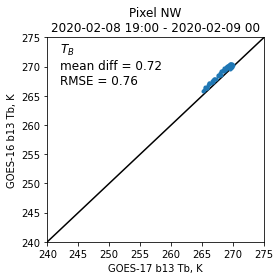

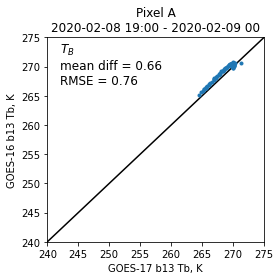

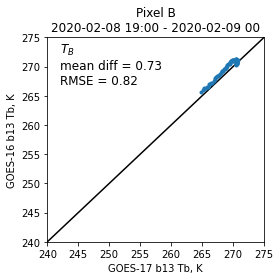

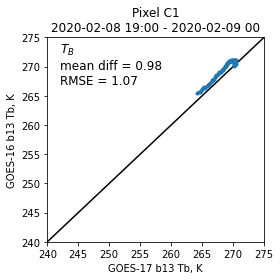

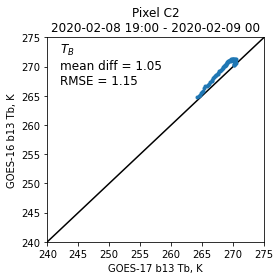

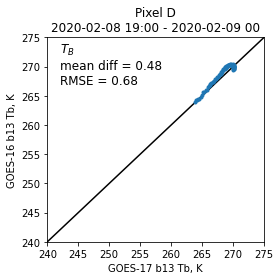

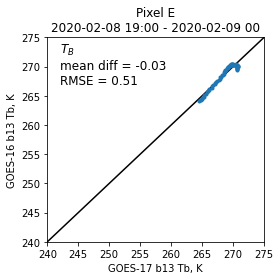

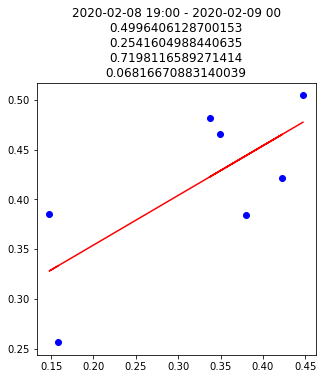

In [13]:
startdate, enddate = '2020-02-08 19:00', '2020-02-09 00'

plt, stats_dict_NW = make_g16_g17_plot(pixelNW_g16_rad, 
                                    pixelNW_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel NW\n{startdate} - {enddate}')

plt, stats_dict_A = make_g16_g17_plot(pixelA_g16_rad, 
                                    pixelA_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel A\n{startdate} - {enddate}')

plt, stats_dict_B = make_g16_g17_plot(pixelB_g16_rad, 
                                    pixelB_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel B\n{startdate} - {enddate}')

plt, stats_dict_C1 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC1_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel C1\n{startdate} - {enddate}')

plt, stats_dict_C2 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC2_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel C2\n{startdate} - {enddate}')

plt, stats_dict_D = make_g16_g17_plot(pixelD_g16_rad, 
                                    pixelD_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel D\n{startdate} - {enddate}')

plt, stats_dict_E = make_g16_g17_plot(pixelE_g16_rad, 
                                    pixelE_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel E\n{startdate} - {enddate}')



tccNW_avg = (tcc20_mean_g16[0] + tcc20_mean_g17[0]) / 2
tccA_avg = (tcc20_mean_g16[1] + tcc20_mean_g17[1]) / 2
tccB_avg = (tcc20_mean_g16[2] + tcc20_mean_g17[2]) / 2
tccC1_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[3]) / 2
tccC2_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[4]) / 2
tccD_avg = (tcc20_mean_g16[4] + tcc20_mean_g17[5]) / 2
tccE_avg = (tcc20_mean_g16[5] + tcc20_mean_g17[6]) / 2

tcc_avg = [tccNW_avg, tccA_avg, tccB_avg, tccC1_avg, tccC2_avg, tccD_avg, tccE_avg]
mean_diffs = [stats_dict_NW['mean_diff'], stats_dict_A['mean_diff'], stats_dict_B['mean_diff'], stats_dict_C1['mean_diff'], stats_dict_C2['mean_diff'], stats_dict_D['mean_diff'], stats_dict_E['mean_diff']]
std_diffs = [stats_dict_NW['std_diff'], stats_dict_A['std_diff'], stats_dict_B['std_diff'], stats_dict_C1['std_diff'], stats_dict_C2['std_diff'], stats_dict_D['std_diff'], stats_dict_E['std_diff']]
max_diffs = [stats_dict_NW['min_diff'], stats_dict_A['min_diff'], stats_dict_B['min_diff'], stats_dict_C1['min_diff'], stats_dict_C2['min_diff'], stats_dict_D['min_diff'], stats_dict_E['min_diff']]
range_diffs = [stats_dict_NW['range_diff'], stats_dict_A['range_diff'], stats_dict_B['range_diff'], stats_dict_C1['range_diff'], stats_dict_C2['range_diff'], stats_dict_D['range_diff'], stats_dict_E['range_diff']]


print(np.mean(mean_diffs))
print(np.mean(std_diffs))
print(np.mean(range_diffs))


plt.figure(figsize=(5,5))
#plt.plot(tcc_avg, mean_diffs, 'o')
plt.plot(tcc_avg, std_diffs, 'ob')
#plt.plot(tcc_avg, max_diffs, 'o')
slope, intercept, r, p, se = stats.linregress(tcc_avg, std_diffs)
plt.plot(tcc_avg, np.array(tcc_avg)*slope + intercept, '-r')
plt.title(f'{startdate} - {enddate}\n{slope}\n{intercept}\n{r}\n{p}')

Feb 11

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  x = g16df[band_tb][startdate:enddate][g16df[startdate:enddate].index.isin(g17df[startdate:enddate].index)]
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y = g17df[band_tb][startdate:enddate]


0.2800144407849069
0.970278523110039
5.102680751255584


Text(0.5, 1.0, '2020-02-11 04:00 - 2020-02-12 00\n1.1494911887843409\n0.6020064854201551\n0.8604467305356409\n0.012943103961204502')

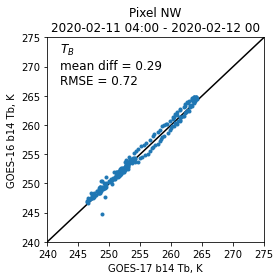

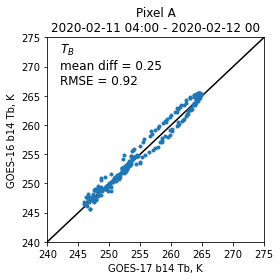

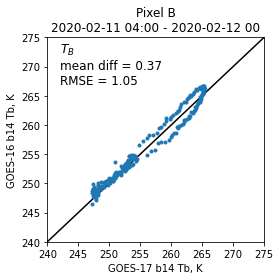

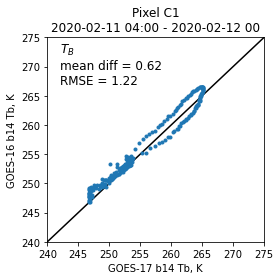

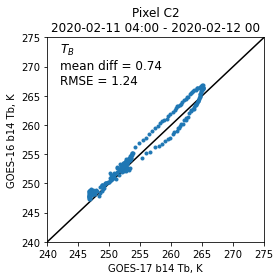

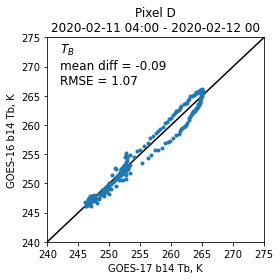

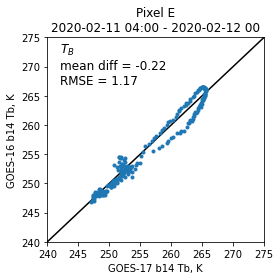

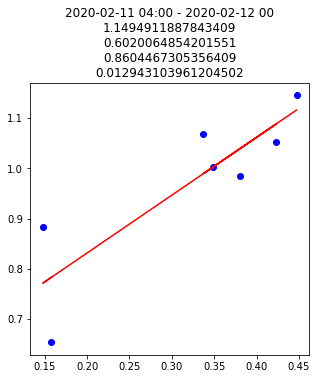

In [14]:
startdate, enddate = '2020-02-11 04:00', '2020-02-12 00'


plt, stats_dict_NW = make_g16_g17_plot(pixelNW_g16_rad, 
                                    pixelNW_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel NW\n{startdate} - {enddate}')

plt, stats_dict_A = make_g16_g17_plot(pixelA_g16_rad, 
                                    pixelA_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel A\n{startdate} - {enddate}')

plt, stats_dict_B = make_g16_g17_plot(pixelB_g16_rad, 
                                    pixelB_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel B\n{startdate} - {enddate}')

plt, stats_dict_C1 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC1_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel C1\n{startdate} - {enddate}')

plt, stats_dict_C2 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC2_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel C2\n{startdate} - {enddate}')

plt, stats_dict_D = make_g16_g17_plot(pixelD_g16_rad, 
                                    pixelD_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel D\n{startdate} - {enddate}')

plt, stats_dict_E = make_g16_g17_plot(pixelE_g16_rad, 
                                    pixelE_g17_rad, 
                                    'b14_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b14 Tb, K', 
                                    ylabel = 'GOES-16 b14 Tb, K',
                                    title=f'Pixel E\n{startdate} - {enddate}')

tccNW_avg = (tcc20_mean_g16[0] + tcc20_mean_g17[0]) / 2
tccA_avg = (tcc20_mean_g16[1] + tcc20_mean_g17[1]) / 2
tccB_avg = (tcc20_mean_g16[2] + tcc20_mean_g17[2]) / 2
tccC1_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[3]) / 2
tccC2_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[4]) / 2
tccD_avg = (tcc20_mean_g16[4] + tcc20_mean_g17[5]) / 2
tccE_avg = (tcc20_mean_g16[5] + tcc20_mean_g17[6]) / 2

tcc_avg = [tccNW_avg, tccA_avg, tccB_avg, tccC1_avg, tccC2_avg, tccD_avg, tccE_avg]
mean_diffs = [stats_dict_NW['mean_diff'], stats_dict_A['mean_diff'], stats_dict_B['mean_diff'], stats_dict_C1['mean_diff'], stats_dict_C2['mean_diff'], stats_dict_D['mean_diff'], stats_dict_E['mean_diff']]
std_diffs = [stats_dict_NW['std_diff'], stats_dict_A['std_diff'], stats_dict_B['std_diff'], stats_dict_C1['std_diff'], stats_dict_C2['std_diff'], stats_dict_D['std_diff'], stats_dict_E['std_diff']]
range_diffs = [stats_dict_NW['range_diff'], stats_dict_A['range_diff'], stats_dict_B['range_diff'], stats_dict_C1['range_diff'], stats_dict_C2['range_diff'], stats_dict_D['range_diff'], stats_dict_E['range_diff']]
max_diffs = [stats_dict_NW['max_diff'], stats_dict_A['max_diff'], stats_dict_B['max_diff'], stats_dict_C1['max_diff'], stats_dict_C2['max_diff'], stats_dict_D['max_diff'], stats_dict_E['max_diff']]



print(np.mean(np.array(mean_diffs)))
print(np.mean(np.array(std_diffs)))
print(np.mean(np.array(range_diffs)))

plt.figure(figsize=(5,5))
#plt.plot(tcc_avg, mean_diffs, 'o')
plt.plot(tcc_avg, std_diffs, 'ob')
#plt.plot(tcc_avg, max_diffs, 'o')
slope, intercept, r, p, se = stats.linregress(tcc_avg, std_diffs)
plt.plot(tcc_avg, np.array(tcc_avg)*slope + intercept, '-r')
plt.title(f'{startdate} - {enddate}\n{slope}\n{intercept}\n{r}\n{p}')

Text(0.5, 1.0, 'GOES-16 - GOES-17, Pixel E\n2020-02-11 14 - 2020-02-12 00')

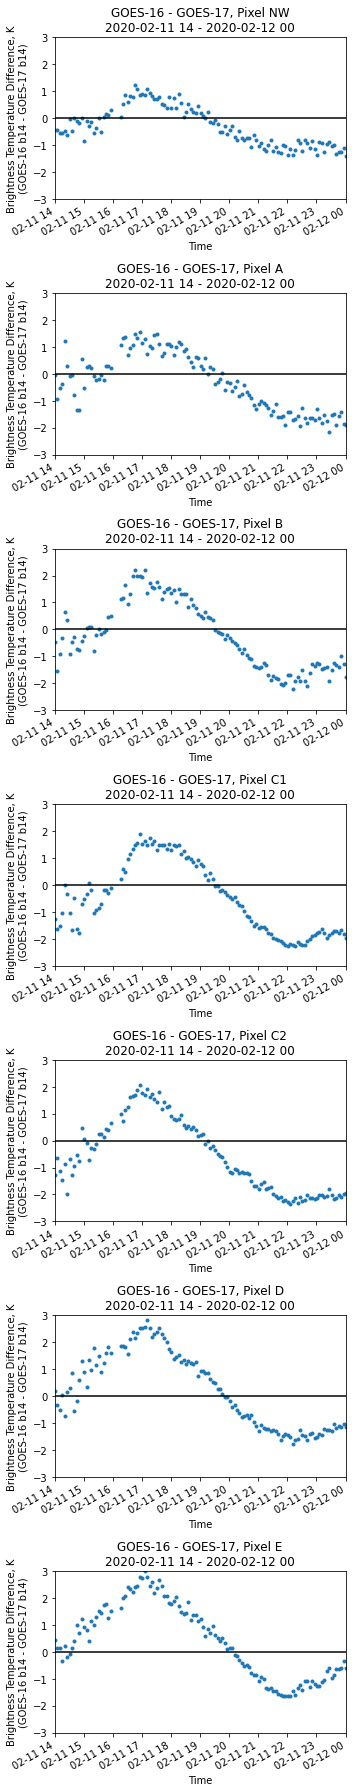

In [15]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=7, ncols= 1, figsize=(5,25), tight_layout=True)

[axNW, axA, axB, axC1, axC2, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16 - GOES-17
#(pixelNW_g16_lst.LST -        pixelNW_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axNW)
#(pixelNW_g16_rad.b13_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(ax=axNW)
(pixelNW_g16_rad.b14_tb_2km - pixelNW_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axNW)

### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
#(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b14_tb_2km - pixelA_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axA)

### Pixel B

# GOES-16 - GOES-17
#(pixelB_g16_lst.LST -        pixelB_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axB)
#(pixelB_g16_rad.b13_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(ax=axB)
(pixelB_g16_rad.b14_tb_2km - pixelB_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axB)

### Pixel C

# GOES-16 - GOES-17 C1
#(pixelC_g16_lst.LST -        pixelC1_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b14_tb_2km - pixelC1_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC1)
# GOES-16 - GOES-17 C2
#(pixelC_g16_lst.LST -        pixelC2_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b14_tb_2km - pixelC2_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC2)

### Pixel D

# GOES-16 - GOES-17
#(pixelD_g16_lst.LST -        pixelD_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axD)
#(pixelD_g16_rad.b13_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(ax=axD)
(pixelD_g16_rad.b14_tb_2km - pixelD_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axD)

### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
#(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b14_tb_2km - pixelE_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axE)

starttime, endtime = '2020-02-11 14', '2020-02-12 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-3,3)
    this_ax.set_ylabel('Brightness Temperature Difference, K\n(GOES-16 b14 - GOES-17 b14)')
    this_ax.set_xlabel('Time')
    
    
axNW.set_title(f'GOES-16 - GOES-17, Pixel NW\n{starttime} - {endtime}')
axA.set_title(f'GOES-16 - GOES-17, Pixel A\n{starttime} - {endtime}')
axB.set_title(f'GOES-16 - GOES-17, Pixel B\n{starttime} - {endtime}')
axC1.set_title(f'GOES-16 - GOES-17, Pixel C1\n{starttime} - {endtime}')
axC2.set_title(f'GOES-16 - GOES-17, Pixel C2\n{starttime} - {endtime}')
axD.set_title(f'GOES-16 - GOES-17, Pixel D\n{starttime} - {endtime}')
axE.set_title(f'GOES-16 - GOES-17, Pixel E\n{starttime} - {endtime}')

Band 13

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  x = g16df[band_tb][startdate:enddate][g16df[startdate:enddate].index.isin(g17df[startdate:enddate].index)]
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\624010984.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  y = g17df[band_tb][startdate:enddate]


0.3228114782939837
0.8869793136750207
5.102680751255584


Text(0.5, 1.0, '2020-02-11 04:00 - 2020-02-12 00\n1.2750610723168727\n0.47847740964756813\n0.9014610092874251\n0.005548228748322736')

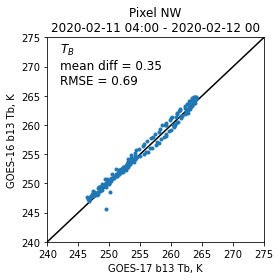

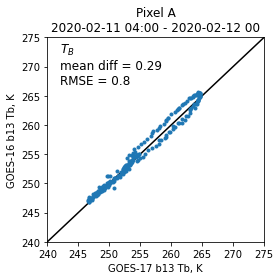

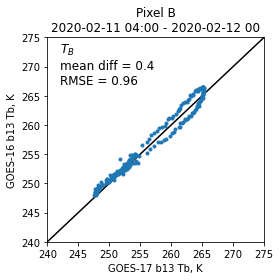

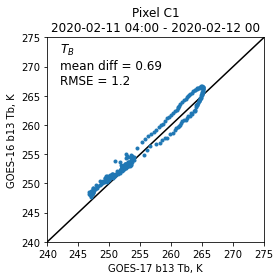

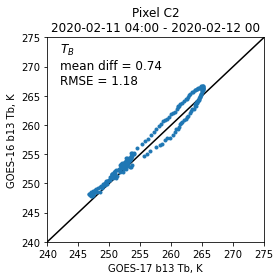

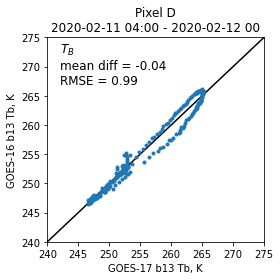

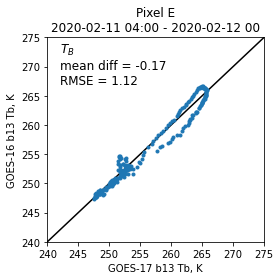

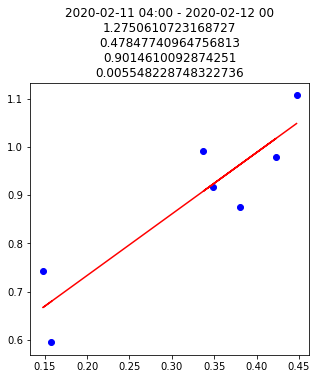

In [16]:
startdate, enddate = '2020-02-11 04:00', '2020-02-12 00'

plt, stats_dict_NW = make_g16_g17_plot(pixelNW_g16_rad, 
                                    pixelNW_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel NW\n{startdate} - {enddate}')

plt, stats_dict_A = make_g16_g17_plot(pixelA_g16_rad, 
                                    pixelA_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel A\n{startdate} - {enddate}')

plt, stats_dict_B = make_g16_g17_plot(pixelB_g16_rad, 
                                    pixelB_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel B\n{startdate} - {enddate}')

plt, stats_dict_C1 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC1_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel C1\n{startdate} - {enddate}')

plt, stats_dict_C2 = make_g16_g17_plot(pixelC_g16_rad, 
                                    pixelC2_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel C2\n{startdate} - {enddate}')

plt, stats_dict_D = make_g16_g17_plot(pixelD_g16_rad, 
                                    pixelD_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel D\n{startdate} - {enddate}')

plt, stats_dict_E = make_g16_g17_plot(pixelE_g16_rad, 
                                    pixelE_g17_rad, 
                                    'b13_tb_2km',
                                    startdate, 
                                    enddate,
                                    axmin=240, 
                                    axmax=275, 
                                    xlabel = 'GOES-17 b13 Tb, K', 
                                    ylabel = 'GOES-16 b13 Tb, K',
                                    title=f'Pixel E\n{startdate} - {enddate}')



tccNW_avg = (tcc20_mean_g16[0] + tcc20_mean_g17[0]) / 2
tccA_avg = (tcc20_mean_g16[1] + tcc20_mean_g17[1]) / 2
tccB_avg = (tcc20_mean_g16[2] + tcc20_mean_g17[2]) / 2
tccC1_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[3]) / 2
tccC2_avg = (tcc20_mean_g16[3] + tcc20_mean_g17[4]) / 2
tccD_avg = (tcc20_mean_g16[4] + tcc20_mean_g17[5]) / 2
tccE_avg = (tcc20_mean_g16[5] + tcc20_mean_g17[6]) / 2

tcc_avg = [tccNW_avg, tccA_avg, tccB_avg, tccC1_avg, tccC2_avg, tccD_avg, tccE_avg]
mean_diffs = [stats_dict_NW['mean_diff'], stats_dict_A['mean_diff'], stats_dict_B['mean_diff'], stats_dict_C1['mean_diff'], stats_dict_C2['mean_diff'], stats_dict_D['mean_diff'], stats_dict_E['mean_diff']]
std_diffs = [stats_dict_NW['std_diff'], stats_dict_A['std_diff'], stats_dict_B['std_diff'], stats_dict_C1['std_diff'], stats_dict_C2['std_diff'], stats_dict_D['std_diff'], stats_dict_E['std_diff']]
max_diffs = [stats_dict_NW['min_diff'], stats_dict_A['min_diff'], stats_dict_B['min_diff'], stats_dict_C1['min_diff'], stats_dict_C2['min_diff'], stats_dict_D['min_diff'], stats_dict_E['min_diff']]


print(np.mean(np.array(mean_diffs)))
print(np.mean(np.array(std_diffs)))
print(np.mean(np.array(range_diffs)))

plt.figure(figsize=(5,5))
#plt.plot(tcc_avg, mean_diffs, 'o')
plt.plot(tcc_avg, std_diffs, 'ob')
#plt.plot(tcc_avg, max_diffs, 'o')
slope, intercept, r, p, se = stats.linregress(tcc_avg, std_diffs)
plt.plot(tcc_avg, np.array(tcc_avg)*slope + intercept, '-r')
plt.title(f'{startdate} - {enddate}\n{slope}\n{intercept}\n{r}\n{p}')

---

Read in airborne IR data for each GOES pixel for flights on Feb 8, and 11, 2020

In [17]:
airborneIR_g16_feb08 = pd.read_csv(path + 'airborne_ir\g16_SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_2020-02-08.csv')
airborneIR_g17_feb08 = pd.read_csv(path + 'airborne_ir\g17_SNOWEX2020_IR_PLANE_2020Feb08_mosaicked_2020-02-08.csv')

airborneIR_g16_feb11 = pd.read_csv(path + 'airborne_ir\g16_SNOWEX2020_IR_PLANE_2020Feb11_mosaicked_2020-02-11.csv')
airborneIR_g17_feb11 = pd.read_csv(path + 'airborne_ir\g17_SNOWEX2020_IR_PLANE_2020Feb11_mosaicked_2020-02-11.csv')

In [18]:
#files = glob.glob(r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\airborne_ir\*_500mBuffer.csv')
#print([t.split('\\')[-1] for t in files])
#
## or with the 500 m buffer around each pixel footprint
#airborneIR_g16_feb08 = pd.read_csv(files[0])
#airborneIR_g17_feb08 = pd.read_csv(files[2])
#
#airborneIR_g16_feb11 = pd.read_csv(files[1])
#airborneIR_g17_feb11 = pd.read_csv(files[3])

In [19]:
df_list = [airborneIR_g16_feb08, airborneIR_g17_feb08, airborneIR_g16_feb11, airborneIR_g17_feb11]
for df in df_list:
    df['datetime'] = pd.to_datetime(df.timestampUTC)
    df.set_index('datetime', inplace=True)
    for colname in ['tb_mean', 'tb_max', 'tb_min']:
        df[f'{colname}_K'] = df[f'{colname}'] + 273.15

In [20]:
# filter out data with n pixels < some % of max pixels we'd expect
# for GOES-16 max pixels seems to be 326626 ~ 330000
# and for GOES-17 258703 ~ 260000
fraction_area = 1/3 # example: if set to 0.5, we need at least half of the pixel to not discard the values
g16_min_pixels = 330000 * fraction_area
g17_min_pixels = 260000 * fraction_area


# GOES-16 Feb 8th
pixelNW_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="NW") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()
pixelA_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="A") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()
pixelB_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="B") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()
pixelC_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="C") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()
pixelD_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="D") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()
pixelE_airborneIR_g16_feb08 = airborneIR_g16_feb08[(airborneIR_g16_feb08.pixel_name=="E") & (airborneIR_g16_feb08.n >= g16_min_pixels)].copy()

# GOES-16 Feb 11th
pixelNW_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="NW") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()
pixelA_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="A") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()
pixelB_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="B") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()
pixelC_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="C") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()
pixelD_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="D") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()
pixelE_airborneIR_g16_feb11 = airborneIR_g16_feb11[(airborneIR_g16_feb11.pixel_name=="E") & (airborneIR_g16_feb11.n >= g16_min_pixels)].copy()


# GOES-17 Feb 8th
pixelNW_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="NW") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelA_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="A") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelB_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="B") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelC1_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="C1") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelC2_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="C2") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelD_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="D") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()
pixelE_airborneIR_g17_feb08 = airborneIR_g17_feb08[(airborneIR_g17_feb08.pixel_name=="E") & (airborneIR_g17_feb08.n >= g17_min_pixels)].copy()

# GOES-17 Feb 11th
pixelNW_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="NW") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelA_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="A") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelB_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="B") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelC1_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="C1") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelC2_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="C2") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelD_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="D") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()
pixelE_airborneIR_g17_feb11 = airborneIR_g17_feb11[(airborneIR_g17_feb11.pixel_name=="E") & (airborneIR_g17_feb11.n >= g17_min_pixels)].copy()

<AxesSubplot:xlabel='datetime'>

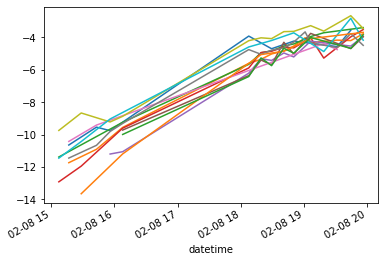

In [21]:

pixelNW_airborneIR_g16_feb08.tb_mean.plot()
pixelA_airborneIR_g16_feb08.tb_mean.plot() 
pixelB_airborneIR_g16_feb08.tb_mean.plot() 
pixelC_airborneIR_g16_feb08.tb_mean.plot() 
pixelD_airborneIR_g16_feb08.tb_mean.plot() 
pixelE_airborneIR_g16_feb08.tb_mean.plot() 

#pixelNW_airborneIR_g16_feb11.tb_mean.plot()
#pixelA_airborneIR_g16_feb11.tb_mean.plot()
#pixelB_airborneIR_g16_feb11.tb_mean.plot()
#pixelC_airborneIR_g16_feb11.tb_mean.plot()
#pixelD_airborneIR_g16_feb11.tb_mean.plot()
#pixelE_airborneIR_g16_feb11.tb_mean.plot()

pixelNW_airborneIR_g17_feb08.tb_mean.plot()
pixelA_airborneIR_g17_feb08.tb_mean.plot() 
pixelB_airborneIR_g17_feb08.tb_mean.plot() 
pixelC1_airborneIR_g17_feb08.tb_mean.plot()
pixelC2_airborneIR_g17_feb08.tb_mean.plot()
pixelD_airborneIR_g17_feb08.tb_mean.plot() 
pixelE_airborneIR_g17_feb08.tb_mean.plot() 

#pixelNW_airborneIR_g17_feb11.tb_mean.plot()
#pixelA_airborneIR_g17_feb11.tb_mean.plot() 
#pixelB_airborneIR_g17_feb11.tb_mean.plot() 
#pixelC1_airborneIR_g17_feb11.tb_mean.plot()
#pixelC2_airborneIR_g17_feb11.tb_mean.plot()
#pixelD_airborneIR_g17_feb11.tb_mean.plot() 
#pixelE_airborneIR_g17_feb11.tb_mean.plot() 

<AxesSubplot:xlabel='datetime'>

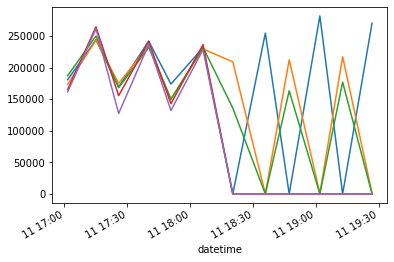

In [22]:
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="A"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="B"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="C"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="D"].n.plot()
airborneIR_g16_feb11[airborneIR_g16_feb11.pixel_name=="E"].n.plot()

---
Plot all together on same graph

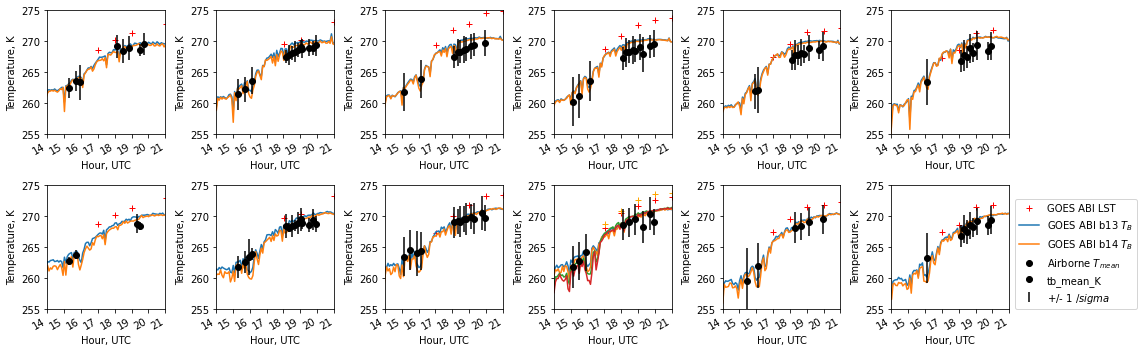

In [23]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

### Pixel NW

# GOES-16
pixelNW_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axNW16, label='GOES-16 LST')
pixelNW_g16_rad.b13_tb_2km.plot(ax=axNW16, label='GOES-16 b13 $T_B$')
pixelNW_g16_rad.b14_tb_2km.plot(ax=axNW16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelNW_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW16, label='Airborne $T_{mean}$')
axNW16.errorbar(pixelNW_airborneIR_g16_feb08.index, pixelNW_airborneIR_g16_feb08.tb_mean_K, yerr=pixelNW_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelNW_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW16, label='Airborne $T_{mean}$')
axNW16.errorbar(pixelNW_airborneIR_g16_feb11.index, pixelNW_airborneIR_g16_feb11.tb_mean_K, yerr=pixelNW_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')

# GOES-17
pixelNW_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axNW17, label='GOES-17 LST')
pixelNW_g17_rad.b13_tb_2km.plot(ax=axNW17, label='GOES-17 b13 $T_B$')
pixelNW_g17_rad.b14_tb_2km.plot(ax=axNW17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelNW_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW17, label='Airborne $T_{mean}$')
axNW17.errorbar(pixelNW_airborneIR_g17_feb08.index, pixelNW_airborneIR_g17_feb08.tb_mean_K, yerr=pixelNW_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelNW_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axNW17, label='Airborne $T_{mean}$')
axNW17.errorbar(pixelNW_airborneIR_g17_feb11.index, pixelNW_airborneIR_g17_feb11.tb_mean_K, yerr=pixelNW_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel A

# GOES-16
pixelA_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axA16, label='GOES-16 LST')
pixelA_g16_rad.b13_tb_2km.plot(ax=axA16, label='GOES-16 b13 $T_B$')
pixelA_g16_rad.b14_tb_2km.plot(ax=axA16, label='GOES-16 b14 $T_B$')


# Airborne Feb 8th
pixelA_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA16, label='Airborne $T_{mean}$')
axA16.errorbar(pixelA_airborneIR_g16_feb08.index, pixelA_airborneIR_g16_feb08.tb_mean_K, yerr=pixelA_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelA_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA16, label='Airborne $T_{mean}$')
axA16.errorbar(pixelA_airborneIR_g16_feb11.index, pixelA_airborneIR_g16_feb11.tb_mean_K, yerr=pixelA_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelA_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axA17, label='GOES-17 LST')
pixelA_g17_rad.b13_tb_2km.plot(ax=axA17, label='GOES-17 b13 $T_B$')
pixelA_g17_rad.b14_tb_2km.plot(ax=axA17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelA_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA17, label='Airborne $T_{mean}$')
axA17.errorbar(pixelA_airborneIR_g17_feb08.index, pixelA_airborneIR_g17_feb08.tb_mean_K, yerr=pixelA_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelA_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axA17, label='Airborne $T_{mean}$')
axA17.errorbar(pixelA_airborneIR_g17_feb11.index, pixelA_airborneIR_g17_feb11.tb_mean_K, yerr=pixelA_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel B

# GOES-16
pixelB_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axB16, label='GOES-16 LST')
pixelB_g16_rad.b13_tb_2km.plot(ax=axB16, label='GOES-16 b13 $T_B$')
pixelB_g16_rad.b14_tb_2km.plot(ax=axB16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelB_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB16, label='Airborne $T_{mean}$')
axB16.errorbar(pixelB_airborneIR_g16_feb08.index, pixelB_airborneIR_g16_feb08.tb_mean_K, yerr=pixelB_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelB_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB16, label='Airborne $T_{mean}$')
axB16.errorbar(pixelB_airborneIR_g16_feb11.index, pixelB_airborneIR_g16_feb11.tb_mean_K, yerr=pixelB_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelB_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axB17, label='GOES-17 LST')
pixelB_g17_rad.b13_tb_2km.plot(ax=axB17, label='GOES-17 b13 $T_B$')
pixelB_g17_rad.b14_tb_2km.plot(ax=axB17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelB_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB17, label='Airborne $T_{mean}$')
axB17.errorbar(pixelB_airborneIR_g17_feb08.index, pixelB_airborneIR_g17_feb08.tb_mean_K, yerr=pixelB_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelB_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axB17, label='Airborne $T_{mean}$')
axB17.errorbar(pixelB_airborneIR_g17_feb11.index, pixelB_airborneIR_g17_feb11.tb_mean_K, yerr=pixelB_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel C

# GOES-16
pixelC_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axC16, label='GOES-16 LST')
pixelC_g16_rad.b13_tb_2km.plot(ax=axC16, label='GOES-16 b13 $T_B$')
pixelC_g16_rad.b14_tb_2km.plot(ax=axC16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelC_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC16, label='Airborne $T_{mean}$')
axC16.errorbar(pixelC_airborneIR_g16_feb08.index, pixelC_airborneIR_g16_feb08.tb_mean_K, yerr=pixelC_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelC_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC16, label='Airborne $T_{mean}$')
axC16.errorbar(pixelC_airborneIR_g16_feb11.index, pixelC_airborneIR_g16_feb11.tb_mean_K, yerr=pixelC_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
#C1
pixelC1_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axC17, label='GOES-17 LST')
pixelC1_g17_rad.b13_tb_2km.plot(ax=axC17, label='GOES-17 b13 $T_B$ (1)')
pixelC1_g17_rad.b14_tb_2km.plot(ax=axC17, label='GOES-17 b14 $T_B$ (1)')
#C2
pixelC2_g17_lst.LST.plot(marker = '+', linestyle='none',  color='orange', ax=axC17, label='GOES-17 LST')
pixelC2_g17_rad.b13_tb_2km.plot(ax=axC17, label='GOES-17 b13 $T_B$ (2)')
pixelC2_g17_rad.b14_tb_2km.plot(ax=axC17, label='GOES-17 b14 $T_B$ (2)')

# Airborne Feb 8th
pixelC1_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC1_airborneIR_g17_feb08.index, pixelC1_airborneIR_g17_feb08.tb_mean_K, yerr=pixelC1_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
pixelC2_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC2_airborneIR_g17_feb08.index, pixelC2_airborneIR_g17_feb08.tb_mean_K, yerr=pixelC2_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelC1_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC1_airborneIR_g17_feb11.index, pixelC1_airborneIR_g17_feb11.tb_mean_K, yerr=pixelC1_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
pixelC2_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axC17, label='Airborne $T_{mean}$')
axC17.errorbar(pixelC2_airborneIR_g17_feb11.index, pixelC2_airborneIR_g17_feb11.tb_mean_K, yerr=pixelC2_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel D

# GOES-16
pixelD_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axD16, label='GOES-16 LST')
pixelD_g16_rad.b13_tb_2km.plot(ax=axD16, label='GOES-16 b13 $T_B$')
pixelD_g16_rad.b14_tb_2km.plot(ax=axD16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelD_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD16, label='Airborne $T_{mean}$')
axD16.errorbar(pixelD_airborneIR_g16_feb08.index, pixelD_airborneIR_g16_feb08.tb_mean_K, yerr=pixelD_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelD_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD16, label='Airborne $T_{mean}$')
axD16.errorbar(pixelD_airborneIR_g16_feb11.index, pixelD_airborneIR_g16_feb11.tb_mean_K, yerr=pixelD_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


# GOES-17
pixelD_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axD17, label='GOES-17 LST')
pixelD_g17_rad.b13_tb_2km.plot(ax=axD17, label='GOES-17 b13 $T_B$')
pixelD_g17_rad.b14_tb_2km.plot(ax=axD17, label='GOES-17 b14 $T_B$')

# Airborne Feb 8th
pixelD_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD17, label='Airborne $T_{mean}$')
axD17.errorbar(pixelD_airborneIR_g17_feb08.index, pixelD_airborneIR_g17_feb08.tb_mean_K, yerr=pixelD_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelD_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axD17, label='Airborne $T_{mean}$')
axD17.errorbar(pixelD_airborneIR_g17_feb11.index, pixelD_airborneIR_g17_feb11.tb_mean_K, yerr=pixelD_airborneIR_g17_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')


### Pixel E

# GOES-16
pixelE_g16_lst.LST.plot(marker = '+', linestyle='none', color='r', ax=axE16, label='GOES-16 LST')
pixelE_g16_rad.b13_tb_2km.plot(ax=axE16, label='GOES-16 b13 $T_B$')
pixelE_g16_rad.b14_tb_2km.plot(ax=axE16, label='GOES-16 b14 $T_B$')

# Airborne Feb 8th
pixelE_airborneIR_g16_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE16, label='Airborne $T_{mean}$')
axE16.errorbar(pixelE_airborneIR_g16_feb08.index, pixelE_airborneIR_g16_feb08.tb_mean_K, yerr=pixelE_airborneIR_g16_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelE_airborneIR_g16_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE16, label='Airborne $T_{mean}$')
axE16.errorbar(pixelE_airborneIR_g16_feb11.index, pixelE_airborneIR_g16_feb11.tb_mean_K, yerr=pixelE_airborneIR_g16_feb11.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')



# GOES-17
pixelE_g17_lst.LST.plot(marker = '+', linestyle='none',  color='r', ax=axE17, label='GOES ABI LST')
pixelE_g17_rad.b13_tb_2km.plot(ax=axE17, label='GOES ABI b13 $T_B$')
pixelE_g17_rad.b14_tb_2km.plot(ax=axE17, label='GOES ABI b14 $T_B$')

# Airborne Feb 8th
pixelE_airborneIR_g17_feb08.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE17, label='Airborne $T_{mean}$')
axE17.errorbar(pixelE_airborneIR_g17_feb08.index, pixelE_airborneIR_g17_feb08.tb_mean_K, yerr=pixelE_airborneIR_g17_feb08.tb_std, color='k', linestyle='none', label='+/- 1 $/sigma$')
# Airborne Feb 11th
pixelE_airborneIR_g17_feb11.tb_mean_K.plot(linestyle='none', marker='o', color='k', ax=axE17)
axE17.errorbar(pixelE_airborneIR_g17_feb11.index, pixelE_airborneIR_g17_feb11.tb_mean_K, yerr=pixelE_airborneIR_g17_feb11.tb_std, color='k', linestyle='none')

axE17.legend(loc=(1.05,0))

# plot formatting
for this_ax in axs.ravel():
    
    this_ax.set_ylim(255,275)
    this_ax.set_ylabel('Temperature, K')
    
    this_ax.set_xlim(pd.Timestamp('2020-02-08 14'), pd.Timestamp('2020-02-08 21'))
    date_form = DateFormatter("%H")
    this_ax.xaxis.set_major_formatter(date_form)
    this_ax.set_xlabel('Hour, UTC')


---

Compare the mean brightness temperature and LST from GOES for a time window around each airborne IR observation with the values from that airborne IR observation

In [24]:
def get_time_window_stats(df, variable_name, times, plus_minus_minutes):
    
    mean_values = []
    std_values = []

    for i, t in enumerate(times):
        window_start_time = pd.to_datetime(t) - datetime.timedelta(minutes=plus_minus_minutes)
        window_end_time = pd.to_datetime(t) + datetime.timedelta(minutes=plus_minus_minutes)

        df_sliced = df[(df.index>window_start_time) & (df.index<window_end_time)]

        mean_values.append(df_sliced[f'{variable_name}'].mean())
        std_values.append(df_sliced[f'{variable_name}'].std())

    return mean_values, std_values

        
def summary_stats(_a, _b):
    '''Compute summary statistics for the difference between two sets.
    Input two flattened (1-D) arrays with NaN values removed'''
    
    # remove nan values
    a = _a[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    b = _b[(np.isnan(_a)==False) & (np.isnan(_b)==False)]
    
    if (len(a) == 0) or (len(b) == 0):
        diff = np.array([np.nan])
        slope, intercept, r_value, p_value, std_err = np.nan, np.nan, np.nan, np.nan, np.nan
    else:
        # for difference stats
        diff = b - a
        # for linear regression stats
        slope, intercept, r_value, p_value, std_err = stats.linregress(a, b)
    
    # populate dict with summary stats
    summary_stats_dict = {
        #'diff' : diff ,
        'min_diff' : np.nanmin( diff ),
        'max_diff' : np.nanmax( diff ),
        'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
        'n' : len(diff) ,
        'mean_diff' : np.nanmean( diff ),
        'median_diff' : np.nanmedian( diff ),
        'mean_squared_diff' : np.nanmean( diff**2 ),
        'rms_diff' : np.sqrt( np.nanmean( diff**2 ) ),
        'std_diff' : np.nanstd( diff ),
        'slope' : slope,
        'intercept' : intercept,
        'r_value' : r_value,
        'r_squared' : r_value**2,
        'p_value' : p_value,
        'std_err' : std_err
        }
    
    return summary_stats_dict 


def make_diff_over_time_plot(this_ax, goesIR_df, airborneIR_df, this_pixel='pixelE', this_goes='g17', plus_minus_minutes=30, goes_variable_name='b14_tb_2km', m='ok'):

    mean_values, std_values = get_time_window_stats(goesIR_df, goes_variable_name, airborneIR_df.index, plus_minus_minutes)
    airborneIR_df[f'{this_pixel}_{this_goes}_tb_mean'] = mean_values
    airborneIR_df[f'{this_pixel}_{this_goes}_tb_std'] = std_values
    airborneIR_df.rename(columns={'tb_mean_K': f'{this_pixel}_tb_mean_K'}, inplace=True)
    stats_dict = summary_stats(airborneIR_df[f'{this_pixel}_tb_mean_K'].values, np.array(mean_values))
    diffs17.append([np.array(mean_values) - airborneIR_df[f'{this_pixel}_tb_mean_K'].values])
    
    
    this_ax.plot(mean_values - airborneIR_df[f'{this_pixel}_tb_mean_K'], 'o', markeredgecolor='w', markerfacecolor='#377eb8', markersize=10)
    this_ax.plot([airborneIR_df.index, airborneIR_df.index],
               [(mean_values - airborneIR_df[f'{this_pixel}_tb_mean_K']) - airborneIR_df.tb_std,
                (mean_values - airborneIR_df[f'{this_pixel}_tb_mean_K']) + airborneIR_df.tb_std], '-', c='#377eb8')
    
    return this_ax

In [25]:
# Select a time window from the GOES timeseries data around each airborne observation
plus_minus_minutes = 5 # e.g. +/- 5 minutes for a 10 minute time window



In [26]:
## If I want to focus on a smaller time window, filter here
#start_time = pd.to_datetime(pd.Timestamp('2020-02-08 17'))
#end_time = pd.to_datetime(pd.Timestamp('2020-02-08 21'))
#
#pixelNW_airborneIR_g16_feb08 = pixelNW_airborneIR_g16_feb08[start_time: end_time]
#pixelA_airborneIR_g16_feb08  = pixelA_airborneIR_g16_feb08[start_time: end_time]
#pixelB_airborneIR_g16_feb08  = pixelB_airborneIR_g16_feb08[start_time: end_time]
#pixelC_airborneIR_g16_feb08  = pixelC_airborneIR_g16_feb08[start_time: end_time]
#pixelD_airborneIR_g16_feb08  = pixelD_airborneIR_g16_feb08[start_time: end_time]
#pixelE_airborneIR_g16_feb08  = pixelE_airborneIR_g16_feb08[start_time: end_time]
#pixelNW_airborneIR_g17_feb08 = pixelNW_airborneIR_g17_feb08[start_time: end_time]
#pixelA_airborneIR_g17_feb08  = pixelA_airborneIR_g17_feb08[start_time: end_time]
#pixelB_airborneIR_g17_feb08  = pixelB_airborneIR_g17_feb08[start_time: end_time]
#pixelC1_airborneIR_g17_feb08 = pixelC1_airborneIR_g17_feb08[start_time: end_time]
#pixelC2_airborneIR_g17_feb08 = pixelC2_airborneIR_g17_feb08[start_time: end_time]
#pixelD_airborneIR_g17_feb08  = pixelD_airborneIR_g17_feb08[start_time: end_time]
#pixelE_airborneIR_g17_feb08  = pixelE_airborneIR_g17_feb08[start_time: end_time]

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\miniconda3\envs\feb8env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\39

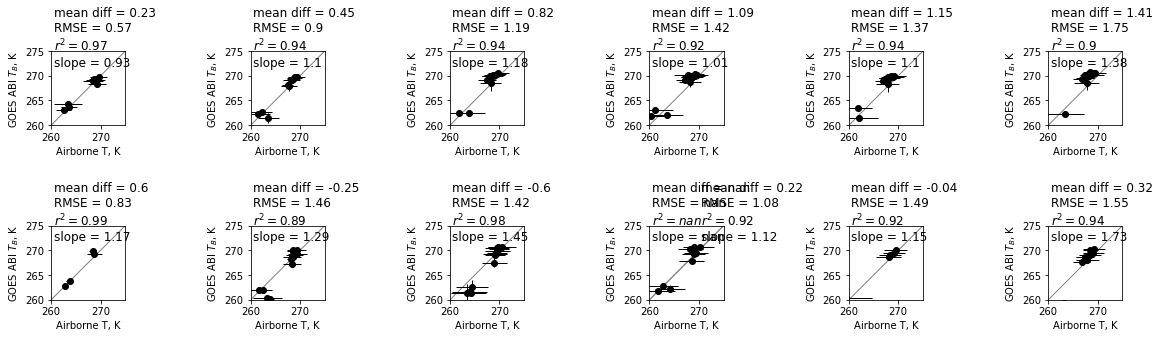

In [27]:
min_ax,max_ax = 260, 275
text_x, text_y = min_ax+0.5, max_ax-3

fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

diffs16 = []
diffs17 = []
# GOES-16 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g16_rad, 'b14_tb_2km', pixelNW_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelNW_airborneIR_g16_feb08['pixelNW_g16_tb_mean'] = mean_values
pixelNW_airborneIR_g16_feb08['pixelNW_g16_tb_std'] = std_values
pixelNW_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelNW_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelNW_airborneIR_g16_feb08.pixelNW_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelNW_airborneIR_g16_feb08.pixelNW_tb_mean_K.values])

axNW16.plot(pixelNW_airborneIR_g16_feb08.pixelNW_tb_mean_K, mean_values, 'ok')
axNW16.errorbar(pixelNW_airborneIR_g16_feb08.pixelNW_tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axNW16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g16_rad, 'b14_tb_2km', pixelA_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelA_airborneIR_g16_feb08['pixelA_g16_tb_mean'] = mean_values
pixelA_airborneIR_g16_feb08['pixelA_g16_tb_std'] = std_values
pixelA_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelA_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelA_airborneIR_g16_feb08.pixelA_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelA_airborneIR_g16_feb08.pixelA_tb_mean_K.values])


axA16.plot(pixelA_airborneIR_g16_feb08.pixelA_tb_mean_K, mean_values, 'ok')
axA16.errorbar(pixelA_airborneIR_g16_feb08.pixelA_tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axA16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g16_rad, 'b14_tb_2km', pixelB_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelB_airborneIR_g16_feb08['pixelB_g16_tb_mean'] = mean_values
pixelB_airborneIR_g16_feb08['pixelB_g16_tb_std'] = std_values
pixelB_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelB_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelB_airborneIR_g16_feb08.pixelB_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelB_airborneIR_g16_feb08.pixelB_tb_mean_K.values])


axB16.plot(pixelB_airborneIR_g16_feb08.pixelB_tb_mean_K, mean_values, 'ok')
axB16.errorbar(pixelB_airborneIR_g16_feb08.pixelB_tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axB16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel C

mean_values, std_values = get_time_window_stats(pixelC_g16_rad, 'b14_tb_2km', pixelC_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelC_airborneIR_g16_feb08['pixelC_g16_tb_mean'] = mean_values
pixelC_airborneIR_g16_feb08['pixelC_g16_tb_std'] = std_values
pixelC_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelC_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC_airborneIR_g16_feb08.pixelC_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelC_airborneIR_g16_feb08.pixelC_tb_mean_K.values])


axC16.plot(pixelC_airborneIR_g16_feb08.pixelC_tb_mean_K, mean_values, 'ok')
axC16.errorbar(pixelC_airborneIR_g16_feb08.pixelC_tb_mean_K, mean_values, 
             xerr=pixelC_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g16_rad, 'b14_tb_2km', pixelD_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelD_airborneIR_g16_feb08['pixelD_g16_tb_mean'] = mean_values
pixelD_airborneIR_g16_feb08['pixelD_g16_tb_std'] = std_values
pixelD_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelD_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelD_airborneIR_g16_feb08.pixelD_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelD_airborneIR_g16_feb08.pixelD_tb_mean_K.values])


axD16.plot(pixelD_airborneIR_g16_feb08.pixelD_tb_mean_K, mean_values, 'ok')
axD16.errorbar(pixelD_airborneIR_g16_feb08.pixelD_tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axD16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g16_rad, 'b14_tb_2km', pixelE_airborneIR_g16_feb08.index, plus_minus_minutes)
pixelE_airborneIR_g16_feb08['pixelE_g16_tb_mean'] = mean_values
pixelE_airborneIR_g16_feb08['pixelE_g16_tb_std'] = std_values
pixelE_airborneIR_g16_feb08.rename(columns={'tb_mean_K': 'pixelE_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelE_airborneIR_g16_feb08.pixelE_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelE_airborneIR_g16_feb08.pixelE_tb_mean_K.values])


axE16.plot(pixelE_airborneIR_g16_feb08.pixelE_tb_mean_K, mean_values, 'ok')
axE16.errorbar(pixelE_airborneIR_g16_feb08.pixelE_tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g16_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axE16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

################

diffs17 = []
# GOES-17 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g17_rad, 'b14_tb_2km', pixelNW_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelNW_airborneIR_g17_feb08['pixelNW_g17_tb_mean'] = mean_values
pixelNW_airborneIR_g17_feb08['pixelNW_g17_tb_std'] = std_values
pixelNW_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelNW_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelNW_airborneIR_g17_feb08.pixelNW_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelNW_airborneIR_g17_feb08.pixelNW_tb_mean_K.values])


axNW17.plot(pixelNW_airborneIR_g17_feb08.pixelNW_tb_mean_K, mean_values, 'ok')
axNW17.errorbar(pixelNW_airborneIR_g17_feb08.pixelNW_tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axNW17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g17_rad, 'b14_tb_2km', pixelA_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelA_airborneIR_g17_feb08['pixelA_g17_tb_mean'] = mean_values
pixelA_airborneIR_g17_feb08['pixelA_g17_tb_std'] = std_values
pixelA_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelA_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelA_airborneIR_g17_feb08.pixelA_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelA_airborneIR_g17_feb08.pixelA_tb_mean_K.values])


axA17.plot(pixelA_airborneIR_g17_feb08.pixelA_tb_mean_K, mean_values, 'ok')
axA17.errorbar(pixelA_airborneIR_g17_feb08.pixelA_tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axA17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g17_rad, 'b14_tb_2km', pixelB_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelB_airborneIR_g17_feb08['pixelB_g17_tb_mean'] = mean_values
pixelB_airborneIR_g17_feb08['pixelB_g17_tb_std'] = std_values
pixelB_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelB_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelB_airborneIR_g17_feb08.pixelB_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelB_airborneIR_g17_feb08.pixelB_tb_mean_K.values])


axB17.plot(pixelB_airborneIR_g17_feb08.pixelB_tb_mean_K, mean_values, 'ok')
axB17.errorbar(pixelB_airborneIR_g17_feb08.pixelB_tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axB17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel C1

mean_values, std_values = get_time_window_stats(pixelC1_g17_rad, 'b14_tb_2km', pixelC1_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelC1_airborneIR_g17_feb08['pixelC1_g17_tb_mean'] = mean_values
pixelC1_airborneIR_g17_feb08['pixelC1_g17_tb_std'] = std_values
pixelC1_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelC1_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC1_airborneIR_g17_feb08.pixelC1_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelC1_airborneIR_g17_feb08.pixelC1_tb_mean_K.values])


axC17.plot(pixelC1_airborneIR_g17_feb08.pixelC1_tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC1_airborneIR_g17_feb08.pixelC1_tb_mean_K, mean_values, 
             xerr=pixelC1_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC17.text(text_x+10, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel C2

mean_values, std_values = get_time_window_stats(pixelC2_g17_rad, 'b14_tb_2km', pixelC2_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelC2_airborneIR_g17_feb08['pixelC2_g17_tb_mean'] = mean_values
pixelC2_airborneIR_g17_feb08['pixelC2_g17_tb_std'] = std_values
pixelC2_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelC2_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC2_airborneIR_g17_feb08.pixelC2_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelC2_airborneIR_g17_feb08.pixelC2_tb_mean_K.values])


axC17.plot(pixelC2_airborneIR_g17_feb08.pixelC2_tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC2_airborneIR_g17_feb08.pixelC2_tb_mean_K, mean_values, 
             xerr=pixelC2_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g17_rad, 'b14_tb_2km', pixelD_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelD_airborneIR_g17_feb08['pixelD_g17_tb_mean'] = mean_values
pixelD_airborneIR_g17_feb08['pixelD_g17_tb_std'] = std_values
pixelD_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelD_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelD_airborneIR_g17_feb08.pixelD_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelD_airborneIR_g17_feb08.pixelD_tb_mean_K.values])


axD17.plot(pixelD_airborneIR_g17_feb08.pixelD_tb_mean_K, mean_values, 'ok')
axD17.errorbar(pixelD_airborneIR_g17_feb08.pixelD_tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axD17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g17_rad, 'b14_tb_2km', pixelE_airborneIR_g17_feb08.index, plus_minus_minutes)
pixelE_airborneIR_g17_feb08['pixelE_g17_tb_mean'] = mean_values
pixelE_airborneIR_g17_feb08['pixelE_g17_tb_std'] = std_values
pixelE_airborneIR_g17_feb08.rename(columns={'tb_mean_K': 'pixelE_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelE_airborneIR_g17_feb08.pixelE_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelE_airborneIR_g17_feb08.pixelE_tb_mean_K.values])


axE17.plot(pixelE_airborneIR_g17_feb08.pixelE_tb_mean_K, mean_values, 'ok')
axE17.errorbar(pixelE_airborneIR_g17_feb08.pixelE_tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g17_feb08.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axE17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)


# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Airborne T, K')
    this_ax.set_ylabel('GOES ABI $T_B$, K')
    this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(min_ax,max_ax)
    this_ax.set_aspect(1)


(-5.0, 7.0)

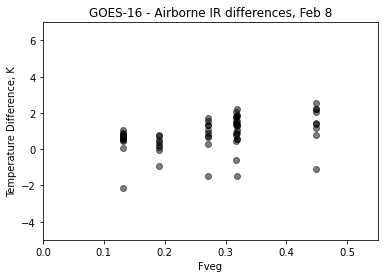

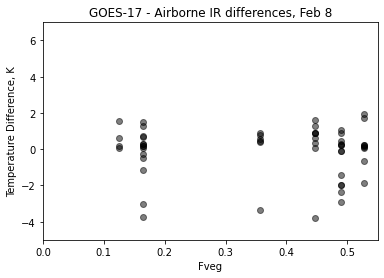

In [28]:
fig, ax = plt.subplots()
for i, px in enumerate(diffs16):
    ax.plot(np.ones(len(px[0]))*tcc20_mean_g16[i], px[0], linestyle='none', marker='o', c='k', alpha=0.5)
ax.set_title('GOES-16 - Airborne IR differences, Feb 8')
ax.set_ylabel('Temperature Difference, K')
ax.set_xlabel('Fveg')
ax.set_xlim(0,0.55)
ax.set_ylim(-5,7)

fig, ax = plt.subplots()
for i, px in enumerate(diffs17):
    ax.plot(np.ones(len(px[0]))*tcc20_mean_g17[i], px[0], linestyle='none', marker='o', c='k', alpha=0.5)
ax.set_title('GOES-17 - Airborne IR differences, Feb 8')
ax.set_ylabel('Temperature Difference, K')
ax.set_xlabel('Fveg')
ax.set_xlim(0,0.55)
ax.set_ylim(-5,7)

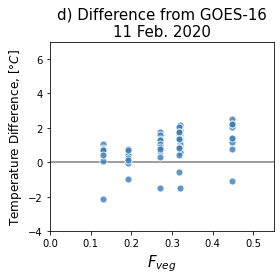

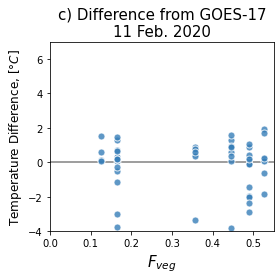

In [29]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
for i, px in enumerate(diffs16):
    ax.plot(len(px)*tcc20_mean_g16[i], px, linestyle='none', marker='o', markerfacecolor='#377eb8', markeredgecolor='w', markersize=7, alpha=0.8)
ax.set_title('d) Difference from GOES-16\n11 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11d.svg')

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
for i, px in enumerate(diffs17):
    ax.plot(len(px)*tcc20_mean_g17[i], px, linestyle='none', marker='o', markerfacecolor='#377eb8', markeredgecolor='w', markersize=7, alpha=0.8)
ax.set_title('c) Difference from GOES-17\n11 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11c.svg')


C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\miniconda3\envs\feb8env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\39

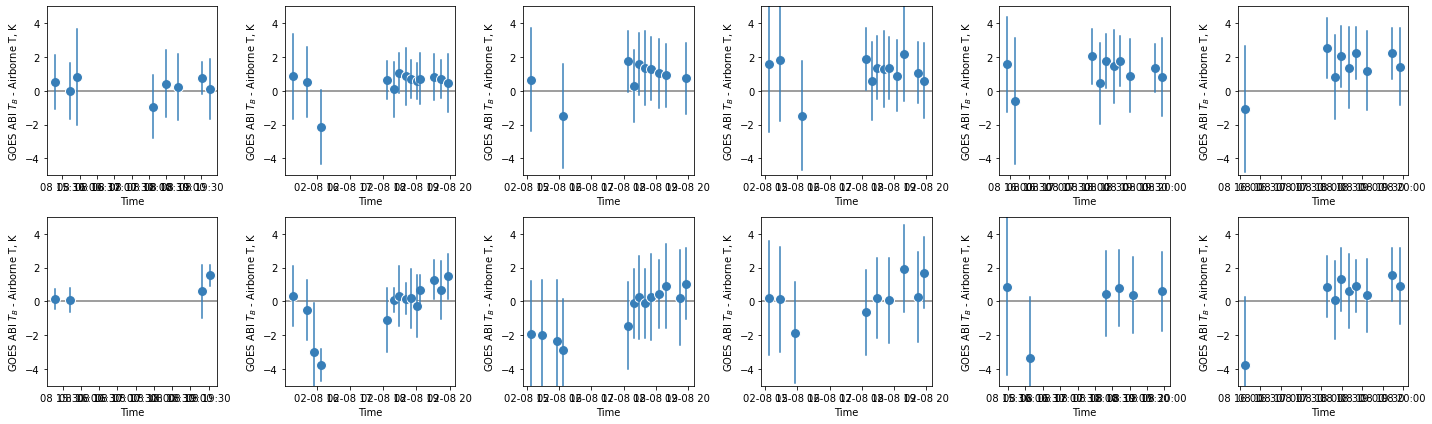

In [30]:
min_ax,max_ax = 260, 275
text_x, text_y = min_ax+0.5, max_ax-4

fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(20,6), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

diffs16 = []
# GOES-16 Pixel NW
make_diff_over_time_plot(this_ax=axNW16, 
                         goesIR_df=pixelNW_g16_rad, 
                         airborneIR_df=pixelNW_airborneIR_g16_feb08, 
                         this_pixel='pixelNW', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel A
make_diff_over_time_plot(this_ax=axA16, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel B
make_diff_over_time_plot(this_ax=axB16, 
                         goesIR_df=pixelB_g16_rad, 
                         airborneIR_df=pixelB_airborneIR_g16_feb08, 
                         this_pixel='pixelB', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel C1
make_diff_over_time_plot(this_ax=axC16, 
                         goesIR_df=pixelC_g16_rad, 
                         airborneIR_df=pixelC_airborneIR_g16_feb08, 
                         this_pixel='pixelC', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')



# GOES-16 Pixel D
make_diff_over_time_plot(this_ax=axD16, 
                         goesIR_df=pixelD_g16_rad, 
                         airborneIR_df=pixelD_airborneIR_g16_feb08, 
                         this_pixel='pixelD', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE16, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


################

diffs17 = []
# GOES-17 Pixel NW
make_diff_over_time_plot(this_ax=axNW17, 
                         goesIR_df=pixelNW_g17_rad, 
                         airborneIR_df=pixelNW_airborneIR_g17_feb08, 
                         this_pixel='pixelNW', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel A
make_diff_over_time_plot(this_ax=axA17, 
                         goesIR_df=pixelA_g17_rad, 
                         airborneIR_df=pixelA_airborneIR_g17_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel B
make_diff_over_time_plot(this_ax=axB17, 
                         goesIR_df=pixelB_g17_rad, 
                         airborneIR_df=pixelB_airborneIR_g17_feb08, 
                         this_pixel='pixelB', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel C1
make_diff_over_time_plot(this_ax=axC17, 
                         goesIR_df=pixelC1_g17_rad, 
                         airborneIR_df=pixelC1_airborneIR_g17_feb08, 
                         this_pixel='pixelC1', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel C2
make_diff_over_time_plot(this_ax=axC17, 
                         goesIR_df=pixelC2_g17_rad, 
                         airborneIR_df=pixelC2_airborneIR_g17_feb08, 
                         this_pixel='pixelC2', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel D
make_diff_over_time_plot(this_ax=axD17, 
                         goesIR_df=pixelD_g17_rad, 
                         airborneIR_df=pixelD_airborneIR_g17_feb08, 
                         this_pixel='pixelD', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-17 Pixel E
make_diff_over_time_plot(this_ax=axE17, 
                         goesIR_df=pixelE_g17_rad, 
                         airborneIR_df=pixelE_airborneIR_g17_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')

# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Time')
    this_ax.set_ylabel('GOES ABI $T_B$ - Airborne T, K')
    #this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(-5,5)
    this_ax.axhline(0,linestyle='-', color='grey', zorder=-999)
    #this_ax.set_aspect(1)


C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\miniconda3\envs\feb8env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\39

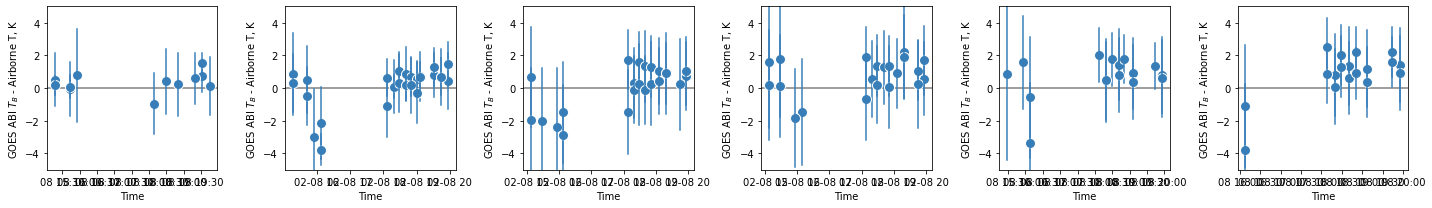

In [31]:
min_ax,max_ax = 260, 275
text_x, text_y = min_ax+0.5, max_ax-4

fig, axs = plt.subplots(nrows=1, ncols= 6, figsize=(20,3), tight_layout=True)

[axNW, axA, axB, axC, axD, axE] = axs.ravel()

diffs16 = []
# GOES-16 Pixel NW
make_diff_over_time_plot(this_ax=axNW, 
                         goesIR_df=pixelNW_g16_rad, 
                         airborneIR_df=pixelNW_airborneIR_g16_feb08, 
                         this_pixel='pixelNW', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel A
make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel B
make_diff_over_time_plot(this_ax=axB, 
                         goesIR_df=pixelB_g16_rad, 
                         airborneIR_df=pixelB_airborneIR_g16_feb08, 
                         this_pixel='pixelB', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel C1
make_diff_over_time_plot(this_ax=axC, 
                         goesIR_df=pixelC_g16_rad, 
                         airborneIR_df=pixelC_airborneIR_g16_feb08, 
                         this_pixel='pixelC', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')



# GOES-16 Pixel D
make_diff_over_time_plot(this_ax=axD, 
                         goesIR_df=pixelD_g16_rad, 
                         airborneIR_df=pixelD_airborneIR_g16_feb08, 
                         this_pixel='pixelD', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


################

diffs17 = []
# GOES-17 Pixel NW
make_diff_over_time_plot(this_ax=axNW, 
                         goesIR_df=pixelNW_g17_rad, 
                         airborneIR_df=pixelNW_airborneIR_g17_feb08, 
                         this_pixel='pixelNW', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel A
make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g17_rad, 
                         airborneIR_df=pixelA_airborneIR_g17_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel B
make_diff_over_time_plot(this_ax=axB, 
                         goesIR_df=pixelB_g17_rad, 
                         airborneIR_df=pixelB_airborneIR_g17_feb08, 
                         this_pixel='pixelB', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel C1
make_diff_over_time_plot(this_ax=axC, 
                         goesIR_df=pixelC1_g17_rad, 
                         airborneIR_df=pixelC1_airborneIR_g17_feb08, 
                         this_pixel='pixelC1', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel C2
make_diff_over_time_plot(this_ax=axC, 
                         goesIR_df=pixelC2_g17_rad, 
                         airborneIR_df=pixelC2_airborneIR_g17_feb08, 
                         this_pixel='pixelC2', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel D
make_diff_over_time_plot(this_ax=axD, 
                         goesIR_df=pixelD_g17_rad, 
                         airborneIR_df=pixelD_airborneIR_g17_feb08, 
                         this_pixel='pixelD', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')


# GOES-17 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g17_rad, 
                         airborneIR_df=pixelE_airborneIR_g17_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g17', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km', m='Db')

# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Time')
    this_ax.set_ylabel('GOES ABI $T_B$ - Airborne T, K')
    #this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(-5,5)
    this_ax.axhline(0,linestyle='-', color='grey', zorder=-999)
    #this_ax.set_aspect(1)


Text(0.5, 1.0, 'GOES-16 - GOES-17, Pixel E\n2020-02-08 14 - 2020-02-09 00')

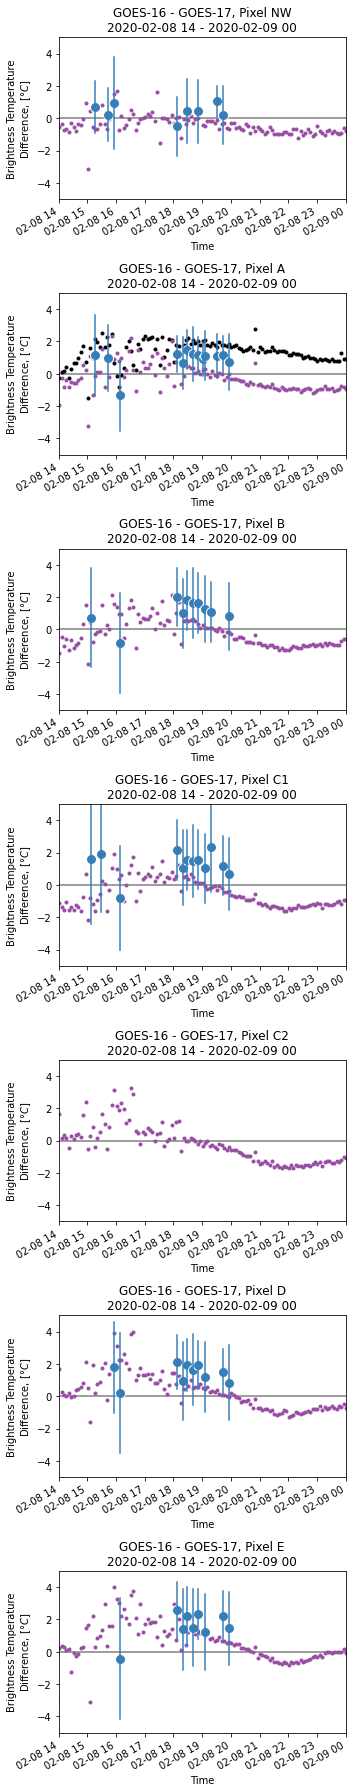

In [32]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=7, ncols= 1, figsize=(5,25), tight_layout=True)

[axNW, axA, axB, axC1, axC2, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16 - GOES-17
#(pixelNW_g16_lst.LST -        pixelNW_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axNW)
#(pixelNW_g16_rad.b13_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(ax=axNW)
(pixelNW_g16_rad.b13_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axNW)

# GOES-16 Pixel NW
make_diff_over_time_plot(this_ax=axNW, 
                         goesIR_df=pixelNW_g16_rad, 
                         airborneIR_df=pixelNW_airborneIR_g16_feb08, 
                         this_pixel='pixelNW', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')


#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=0
#axNW.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'Dr')
#axNW.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', color='r')


### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
#(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axA)


# GOES-16 vs snow pit 2S10, pixel A
(pixelA_g16_rad.b13_tb_2km - df_merged.rad_avg).plot(marker='.', c='k', linestyle='none', ax=axA, zorder=-100)

# GOES-16 Pixel A
axA = make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=1
#axA.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'D', c='#e41a1c', markersize=10)
#axA.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', c='#e41a1c')



### Pixel B

# GOES-16 - GOES-17
#(pixelB_g16_lst.LST -        pixelB_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axB)
#(pixelB_g16_rad.b13_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(ax=axB)
(pixelB_g16_rad.b13_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axB)

# GOES-16 Pixel B
make_diff_over_time_plot(this_ax=axB, 
                         goesIR_df=pixelB_g16_rad, 
                         airborneIR_df=pixelB_airborneIR_g16_feb08, 
                         this_pixel='pixelB', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=2
#axB.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'Dr')
#axB.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', color='r')



### Pixel C

# GOES-16 - GOES-17 C1
#(pixelC_g16_lst.LST -        pixelC1_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b13_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axC1)
# GOES-16 - GOES-17 C2
#(pixelC_g16_lst.LST -        pixelC2_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b13_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axC2)

# GOES-16 Pixel C1
make_diff_over_time_plot(this_ax=axC1, 
                         goesIR_df=pixelC_g16_rad, 
                         airborneIR_df=pixelC_airborneIR_g16_feb08, 
                         this_pixel='pixelC', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=3
#axC1.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'Dr')
#axC1.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', color='r')


### Pixel D

# GOES-16 - GOES-17
#(pixelD_g16_lst.LST -        pixelD_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axD)
#(pixelD_g16_rad.b13_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(ax=axD)
(pixelD_g16_rad.b13_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axD)

# GOES-16 Pixel D
make_diff_over_time_plot(this_ax=axD, 
                         goesIR_df=pixelD_g16_rad, 
                         airborneIR_df=pixelD_airborneIR_g16_feb08, 
                         this_pixel='pixelD', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')


#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=4
#axD.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'Dr')
#axD.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', color='r')


### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
#(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axE)

# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

#aster_time = np.datetime64('2020-02-08T18:07:48')
#i=5
#axE.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'D', c='#e41a1c', markersize=10)
#axE.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', c='#e41a1c')

starttime, endtime = '2020-02-08 14', '2020-02-09 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k', alpha=0.5, zorder=-9999)
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-5,5)
    this_ax.set_ylabel('Brightness Temperature\nDifference, [$\degree C$]')
    this_ax.set_xlabel('Time')
    
    
axNW.set_title(f'GOES-16 - GOES-17, Pixel NW\n{starttime} - {endtime}')
axA.set_title(f'GOES-16 - GOES-17, Pixel A\n{starttime} - {endtime}')
axB.set_title(f'GOES-16 - GOES-17, Pixel B\n{starttime} - {endtime}')
axC1.set_title(f'GOES-16 - GOES-17, Pixel C1\n{starttime} - {endtime}')
axC2.set_title(f'GOES-16 - GOES-17, Pixel C2\n{starttime} - {endtime}')
axD.set_title(f'GOES-16 - GOES-17, Pixel D\n{starttime} - {endtime}')
axE.set_title(f'GOES-16 - GOES-17, Pixel E\n{starttime} - {endtime}')

In [33]:
len(diffs17)

13

In [34]:
%matplotlib inline
from functools import reduce
dataframe_list = [pixelNW_airborneIR_g17_feb08,
                    pixelA_airborneIR_g17_feb08,
                    pixelB_airborneIR_g17_feb08,
                    pixelC1_airborneIR_g17_feb08,
                    pixelC2_airborneIR_g17_feb08,
                    pixelD_airborneIR_g17_feb08,
                    pixelE_airborneIR_g17_feb08]

g17_airborne_feb08 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)

g17_airborne_feb08['NW_mean_diff'] = g17_airborne_feb08.pixelNW_g17_tb_mean - g17_airborne_feb08.pixelNW_tb_mean_K
g17_airborne_feb08['A_mean_diff'] = g17_airborne_feb08.pixelA_g17_tb_mean - g17_airborne_feb08.pixelA_tb_mean_K
g17_airborne_feb08['B_mean_diff'] = g17_airborne_feb08.pixelB_g17_tb_mean - g17_airborne_feb08.pixelB_tb_mean_K
g17_airborne_feb08['C1_mean_diff'] = g17_airborne_feb08.pixelC1_g17_tb_mean - g17_airborne_feb08.pixelC1_tb_mean_K
g17_airborne_feb08['C2_mean_diff'] = g17_airborne_feb08.pixelC2_g17_tb_mean - g17_airborne_feb08.pixelC2_tb_mean_K
g17_airborne_feb08['D_mean_diff'] = g17_airborne_feb08.pixelD_g17_tb_mean - g17_airborne_feb08.pixelD_tb_mean_K
g17_airborne_feb08['E_mean_diff'] = g17_airborne_feb08.pixelE_g17_tb_mean - g17_airborne_feb08.pixelE_tb_mean_K

# merge all dataframes
mean_diffs = np.array([  g17_airborne_feb08.NW_mean_diff.values,
                g17_airborne_feb08.A_mean_diff.values,
                g17_airborne_feb08.B_mean_diff.values,
                g17_airborne_feb08.C1_mean_diff.values,
                g17_airborne_feb08.C2_mean_diff.values,
                g17_airborne_feb08.D_mean_diff.values,
                g17_airborne_feb08.E_mean_diff.values])

# for each timestep (row) in the new merged dataframe
for i in range(mean_diffs.shape[1]):
    plt.figure(figsize=(5,3))
    # sort by TCC (fveg) values
    arr1inds = np.array(tcc20_mean_g17)[~np.isnan( mean_diffs[:,i])].argsort()
    sorted_mean_diffs = mean_diffs[:,i][~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    sorted_tcc20_mean_g17 = np.array(tcc20_mean_g17)[~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    # plot mean difference versus fveg for each timestep
    plt.plot(sorted_tcc20_mean_g17, sorted_mean_diffs,'-o')
    try:
        plt.text(0.01, sorted_mean_diffs[0], str(g17_airborne_feb08.timestampUTC.values[i]))
    except:
        None
    plt.ylim(-5,2)
    plt.xlim(0,0.5)
    plt.title('GOES-17 - Airborne IR, Feb 8, 2020')
    #plt.savefig('GOES-17 - Airborne IR Feb 8 2020'+str(g17_airborne_feb08.timestampUTC.values[i]).replace(':','')+'.jpg')
    plt.close()
    
    
    
#############

from functools import reduce
dataframe_list = [pixelNW_airborneIR_g16_feb08,
                    pixelA_airborneIR_g16_feb08,
                    pixelB_airborneIR_g16_feb08,
                    pixelC_airborneIR_g16_feb08,
                    pixelD_airborneIR_g16_feb08,
                    pixelE_airborneIR_g16_feb08]

g16_airborne_feb08 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)

g16_airborne_feb08['NW_mean_diff'] = g16_airborne_feb08.pixelNW_g16_tb_mean - g16_airborne_feb08.pixelNW_tb_mean_K
g16_airborne_feb08['A_mean_diff'] = g16_airborne_feb08.pixelA_g16_tb_mean - g16_airborne_feb08.pixelA_tb_mean_K
g16_airborne_feb08['B_mean_diff'] = g16_airborne_feb08.pixelB_g16_tb_mean - g16_airborne_feb08.pixelB_tb_mean_K
g16_airborne_feb08['C_mean_diff'] = g16_airborne_feb08.pixelC_g16_tb_mean - g16_airborne_feb08.pixelC_tb_mean_K
g16_airborne_feb08['D_mean_diff'] = g16_airborne_feb08.pixelD_g16_tb_mean - g16_airborne_feb08.pixelD_tb_mean_K
g16_airborne_feb08['E_mean_diff'] = g16_airborne_feb08.pixelE_g16_tb_mean - g16_airborne_feb08.pixelE_tb_mean_K

# merge all dataframes
mean_diffs = np.array([  g16_airborne_feb08.NW_mean_diff.values,
                g16_airborne_feb08.A_mean_diff.values,
                g16_airborne_feb08.B_mean_diff.values,
                g16_airborne_feb08.C_mean_diff.values,
                g16_airborne_feb08.D_mean_diff.values,
                g16_airborne_feb08.E_mean_diff.values])



# for each timestep (row) in the new merged dataframe
for i in range(mean_diffs.shape[1]):
    plt.figure(figsize=(5,3))
    # sort by TCC (fveg) values
    arr1inds = np.array(tcc20_mean_g16)[~np.isnan( mean_diffs[:,i])].argsort()
    sorted_mean_diffs = mean_diffs[:,i][~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    sorted_tcc20_mean_g16 = np.array(tcc20_mean_g16)[~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    # plot mean difference versus fveg for each timestep
    plt.plot(sorted_tcc20_mean_g16, sorted_mean_diffs,'-o')
    try:
        plt.text(0.01, sorted_mean_diffs[0], str(g16_airborne_feb08.timestampUTC.values[i]))
    except:
        None
    plt.ylim(-5,2)
    plt.xlim(0,0.5)
    plt.title('GOES-16 - Airborne IR, Feb 8, 2020')
    #plt.savefig('GOES-16 - Airborne IR Feb 8 2020'+str(g16_airborne_feb08.timestampUTC.values[i]).replace(':','')+'.jpg')
    plt.close()

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\2004442644.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tb_min_K_x', 'Unnamed: 0_x', 'tb_min_x', 'tb_mean_x', 'n_x', 'tb_max_x', 'ir_filepath_x', 'tb_max_K_x', 'figure_filename_x', 'pixel_name_x', 'tb_std_x'} in the result is deprecated and will raise a MergeError in a future version.
  g17_airborne_feb08 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\2004442644.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tb_min_K_x', 'Unnamed: 0_x', 'tb_min_x', 'tb_mean_x', 'n_x', 'tb_max_x', 'ir_filepath_x', 'tb_max_K_x', 'figure_filename_x', 'pixel_name_x', 'tb_std_x'} in the result is deprecated and will raise a MergeError in a future version.
  g17_airborne_feb08 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)
C:\Users\steve\AppData\Local

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\miniconda3\envs\feb8env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\39

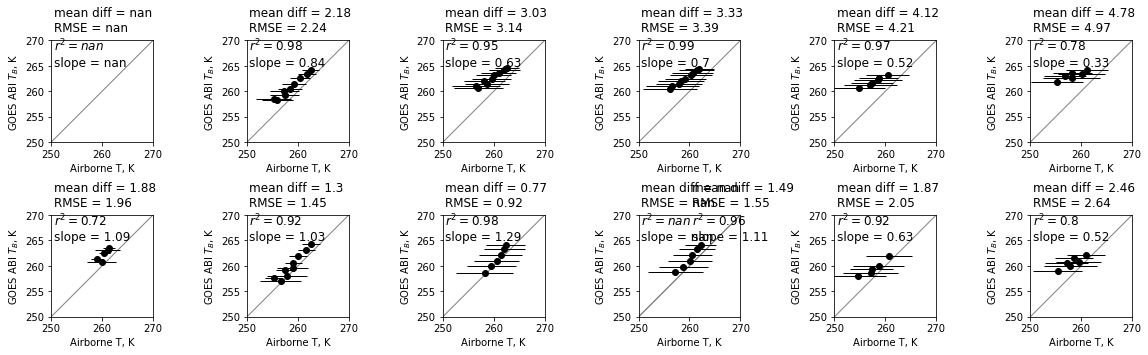

In [35]:
min_ax,max_ax = 250, 270
text_x, text_y = min_ax+0.5, max_ax-5

fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(16,5), tight_layout=True)

[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()

diffs16 = []
# GOES-16 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g16_rad, 'b14_tb_2km', pixelNW_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelNW_airborneIR_g16_feb11['pixelNW_g16_tb_mean'] = mean_values
pixelNW_airborneIR_g16_feb11['pixelNW_g16_tb_std'] = std_values
pixelNW_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelNW_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelNW_airborneIR_g16_feb11.pixelNW_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelNW_airborneIR_g16_feb11.pixelNW_tb_mean_K.values])

axNW16.plot(pixelNW_airborneIR_g16_feb11.pixelNW_tb_mean_K, mean_values, 'ok')
axNW16.errorbar(pixelNW_airborneIR_g16_feb11.pixelNW_tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axNW16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g16_rad, 'b14_tb_2km', pixelA_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelA_airborneIR_g16_feb11['pixelA_g16_tb_mean'] = mean_values
pixelA_airborneIR_g16_feb11['pixelA_g16_tb_std'] = std_values
pixelA_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelA_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelA_airborneIR_g16_feb11.pixelA_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelA_airborneIR_g16_feb11.pixelA_tb_mean_K.values])


axA16.plot(pixelA_airborneIR_g16_feb11.pixelA_tb_mean_K, mean_values, 'ok')
axA16.errorbar(pixelA_airborneIR_g16_feb11.pixelA_tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axA16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g16_rad, 'b14_tb_2km', pixelB_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelB_airborneIR_g16_feb11['pixelB_g16_tb_mean'] = mean_values
pixelB_airborneIR_g16_feb11['pixelB_g16_tb_std'] = std_values
pixelB_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelB_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelB_airborneIR_g16_feb11.pixelB_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelB_airborneIR_g16_feb11.pixelB_tb_mean_K.values])


axB16.plot(pixelB_airborneIR_g16_feb11.pixelB_tb_mean_K, mean_values, 'ok')
axB16.errorbar(pixelB_airborneIR_g16_feb11.pixelB_tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axB16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel C

mean_values, std_values = get_time_window_stats(pixelC_g16_rad, 'b14_tb_2km', pixelC_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelC_airborneIR_g16_feb11['pixelC_g16_tb_mean'] = mean_values
pixelC_airborneIR_g16_feb11['pixelC_g16_tb_std'] = std_values
pixelC_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelC_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC_airborneIR_g16_feb11.pixelC_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelC_airborneIR_g16_feb11.pixelC_tb_mean_K.values])


axC16.plot(pixelC_airborneIR_g16_feb11.pixelC_tb_mean_K, mean_values, 'ok')
axC16.errorbar(pixelC_airborneIR_g16_feb11.pixelC_tb_mean_K, mean_values, 
             xerr=pixelC_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g16_rad, 'b14_tb_2km', pixelD_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelD_airborneIR_g16_feb11['pixelD_g16_tb_mean'] = mean_values
pixelD_airborneIR_g16_feb11['pixelD_g16_tb_std'] = std_values
pixelD_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelD_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelD_airborneIR_g16_feb11.pixelD_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelD_airborneIR_g16_feb11.pixelD_tb_mean_K.values])


axD16.plot(pixelD_airborneIR_g16_feb11.pixelD_tb_mean_K, mean_values, 'ok')
axD16.errorbar(pixelD_airborneIR_g16_feb11.pixelD_tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axD16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-16 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g16_rad, 'b14_tb_2km', pixelE_airborneIR_g16_feb11.index, plus_minus_minutes)
pixelE_airborneIR_g16_feb11['pixelE_g16_tb_mean'] = mean_values
pixelE_airborneIR_g16_feb11['pixelE_g16_tb_std'] = std_values
pixelE_airborneIR_g16_feb11.rename(columns={'tb_mean_K': 'pixelE_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelE_airborneIR_g16_feb11.pixelE_tb_mean_K.values, np.array(mean_values))
diffs16.append([np.array(mean_values) - pixelE_airborneIR_g16_feb11.pixelE_tb_mean_K.values])


axE16.plot(pixelE_airborneIR_g16_feb11.pixelE_tb_mean_K, mean_values, 'ok')
axE16.errorbar(pixelE_airborneIR_g16_feb11.pixelE_tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g16_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE16.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axE16.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

################

diffs17 = []
# GOES-17 Pixel NW

mean_values, std_values = get_time_window_stats(pixelNW_g17_rad, 'b14_tb_2km', pixelNW_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelNW_airborneIR_g17_feb11['pixelNW_g17_tb_mean'] = mean_values
pixelNW_airborneIR_g17_feb11['pixelNW_g17_tb_std'] = std_values
pixelNW_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelNW_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelNW_airborneIR_g17_feb11.pixelNW_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelNW_airborneIR_g17_feb11.pixelNW_tb_mean_K.values])


axNW17.plot(pixelNW_airborneIR_g17_feb11.pixelNW_tb_mean_K, mean_values, 'ok')
axNW17.errorbar(pixelNW_airborneIR_g17_feb11.pixelNW_tb_mean_K, mean_values, 
             xerr=pixelNW_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axNW17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axNW17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel A

mean_values, std_values = get_time_window_stats(pixelA_g17_rad, 'b14_tb_2km', pixelA_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelA_airborneIR_g17_feb11['pixelA_g17_tb_mean'] = mean_values
pixelA_airborneIR_g17_feb11['pixelA_g17_tb_std'] = std_values
pixelA_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelA_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelA_airborneIR_g17_feb11.pixelA_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelA_airborneIR_g17_feb11.pixelA_tb_mean_K.values])


axA17.plot(pixelA_airborneIR_g17_feb11.pixelA_tb_mean_K, mean_values, 'ok')
axA17.errorbar(pixelA_airborneIR_g17_feb11.pixelA_tb_mean_K, mean_values, 
             xerr=pixelA_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axA17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axA17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel B

mean_values, std_values = get_time_window_stats(pixelB_g17_rad, 'b14_tb_2km', pixelB_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelB_airborneIR_g17_feb11['pixelB_g17_tb_mean'] = mean_values
pixelB_airborneIR_g17_feb11['pixelB_g17_tb_std'] = std_values
pixelB_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelB_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelB_airborneIR_g17_feb11.pixelB_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelB_airborneIR_g17_feb11.pixelB_tb_mean_K.values])


axB17.plot(pixelB_airborneIR_g17_feb11.pixelB_tb_mean_K, mean_values, 'ok')
axB17.errorbar(pixelB_airborneIR_g17_feb11.pixelB_tb_mean_K, mean_values, 
             xerr=pixelB_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axB17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axB17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel C1

mean_values, std_values = get_time_window_stats(pixelC1_g17_rad, 'b14_tb_2km', pixelC1_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelC1_airborneIR_g17_feb11['pixelC1_g17_tb_mean'] = mean_values
pixelC1_airborneIR_g17_feb11['pixelC1_g17_tb_std'] = std_values
pixelC1_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelC1_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC1_airborneIR_g17_feb11.pixelC1_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelC1_airborneIR_g17_feb11.pixelC1_tb_mean_K.values])


axC17.plot(pixelC1_airborneIR_g17_feb11.pixelC1_tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC1_airborneIR_g17_feb11.pixelC1_tb_mean_K, mean_values, 
             xerr=pixelC1_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC17.text(text_x+10, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel C2

mean_values, std_values = get_time_window_stats(pixelC2_g17_rad, 'b14_tb_2km', pixelC2_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelC2_airborneIR_g17_feb11['pixelC2_g17_tb_mean'] = mean_values
pixelC2_airborneIR_g17_feb11['pixelC2_g17_tb_std'] = std_values
pixelC2_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelC2_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelC2_airborneIR_g17_feb11.pixelC2_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelC2_airborneIR_g17_feb11.pixelC2_tb_mean_K.values])


axC17.plot(pixelC2_airborneIR_g17_feb11.pixelC2_tb_mean_K, mean_values, 'ok')
axC17.errorbar(pixelC2_airborneIR_g17_feb11.pixelC2_tb_mean_K, mean_values, 
             xerr=pixelC2_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axC17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axC17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel D

mean_values, std_values = get_time_window_stats(pixelD_g17_rad, 'b14_tb_2km', pixelD_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelD_airborneIR_g17_feb11['pixelD_g17_tb_mean'] = mean_values
pixelD_airborneIR_g17_feb11['pixelD_g17_tb_std'] = std_values
pixelD_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelD_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelD_airborneIR_g17_feb11.pixelD_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelD_airborneIR_g17_feb11.pixelD_tb_mean_K.values])


axD17.plot(pixelD_airborneIR_g17_feb11.pixelD_tb_mean_K, mean_values, 'ok')
axD17.errorbar(pixelD_airborneIR_g17_feb11.pixelD_tb_mean_K, mean_values, 
             xerr=pixelD_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axD17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axD17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)

# GOES-17 Pixel E

mean_values, std_values = get_time_window_stats(pixelE_g17_rad, 'b14_tb_2km', pixelE_airborneIR_g17_feb11.index, plus_minus_minutes)
pixelE_airborneIR_g17_feb11['pixelE_g17_tb_mean'] = mean_values
pixelE_airborneIR_g17_feb11['pixelE_g17_tb_std'] = std_values
pixelE_airborneIR_g17_feb11.rename(columns={'tb_mean_K': 'pixelE_tb_mean_K'}, inplace=True)
stats_dict = summary_stats(pixelE_airborneIR_g17_feb11.pixelE_tb_mean_K.values, np.array(mean_values))
diffs17.append([np.array(mean_values) - pixelE_airborneIR_g17_feb11.pixelE_tb_mean_K.values])


axE17.plot(pixelE_airborneIR_g17_feb11.pixelE_tb_mean_K, mean_values, 'ok')
axE17.errorbar(pixelE_airborneIR_g17_feb11.pixelE_tb_mean_K, mean_values, 
             xerr=pixelE_airborneIR_g17_feb11.tb_std, yerr=std_values, linestyle='none', color='k', lw=1, zorder=-98)
axE17.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
s4 = str(np.round(stats_dict['slope'],2))
axE17.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$\nslope = {s4}', fontsize=12)


# plot formatting
for this_ax in axs.ravel():
    this_ax.set_xlabel('Airborne T, K')
    this_ax.set_ylabel('GOES ABI $T_B$, K')
    this_ax.set_xlim(min_ax,max_ax)
    this_ax.set_ylim(min_ax,max_ax)
    this_ax.set_aspect(1)


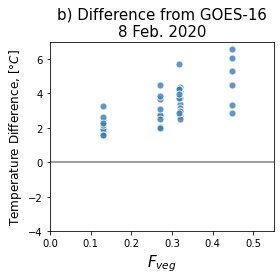

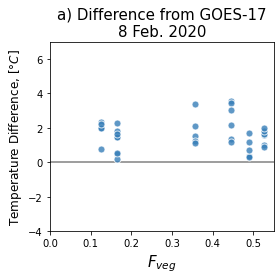

In [36]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
for i, px in enumerate(diffs16):
    ax.plot(len(px)*tcc20_mean_g16[i], px, linestyle='none', marker='o', markerfacecolor='#377eb8', markeredgecolor='w', markersize=7, alpha=0.8)
ax.set_title('b) Difference from GOES-16\n8 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11b.svg')

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
for i, px in enumerate(diffs17):
    ax.plot(len(px)*tcc20_mean_g17[i], px, linestyle='none', marker='o', markerfacecolor='#377eb8', markeredgecolor='w', markersize=7, alpha=0.8)
ax.set_title('a) Difference from GOES-17\n8 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11a.svg')


In [37]:
from functools import reduce
dataframe_list = [pixelNW_airborneIR_g17_feb11,
                    pixelA_airborneIR_g17_feb11,
                    pixelB_airborneIR_g17_feb11,
                    pixelC1_airborneIR_g17_feb11,
                    pixelC2_airborneIR_g17_feb11,
                    pixelD_airborneIR_g17_feb11,
                    pixelE_airborneIR_g17_feb11]

g17_airborne_feb11 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)

g17_airborne_feb11['NW_mean_diff'] = g17_airborne_feb11.pixelNW_g17_tb_mean - g17_airborne_feb11.pixelNW_tb_mean_K
g17_airborne_feb11['A_mean_diff'] = g17_airborne_feb11.pixelA_g17_tb_mean - g17_airborne_feb11.pixelA_tb_mean_K
g17_airborne_feb11['B_mean_diff'] = g17_airborne_feb11.pixelB_g17_tb_mean - g17_airborne_feb11.pixelB_tb_mean_K
g17_airborne_feb11['C1_mean_diff'] = g17_airborne_feb11.pixelC1_g17_tb_mean - g17_airborne_feb11.pixelC1_tb_mean_K
g17_airborne_feb11['C2_mean_diff'] = g17_airborne_feb11.pixelC2_g17_tb_mean - g17_airborne_feb11.pixelC2_tb_mean_K
g17_airborne_feb11['D_mean_diff'] = g17_airborne_feb11.pixelD_g17_tb_mean - g17_airborne_feb11.pixelD_tb_mean_K
g17_airborne_feb11['E_mean_diff'] = g17_airborne_feb11.pixelE_g17_tb_mean - g17_airborne_feb11.pixelE_tb_mean_K

# merge all dataframes
mean_diffs = np.array([  g17_airborne_feb11.NW_mean_diff.values,
                g17_airborne_feb11.A_mean_diff.values,
                g17_airborne_feb11.B_mean_diff.values,
                g17_airborne_feb11.C1_mean_diff.values,
                g17_airborne_feb11.C2_mean_diff.values,
                g17_airborne_feb11.D_mean_diff.values,
                g17_airborne_feb11.E_mean_diff.values])

# for each timestep (row) in the new merged dataframe
for i in range(mean_diffs.shape[1]):
    plt.figure(figsize=(5,3))
    # sort by TCC (fveg) values
    arr1inds = np.array(tcc20_mean_g17)[~np.isnan( mean_diffs[:,i])].argsort()
    sorted_mean_diffs = mean_diffs[:,i][~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    sorted_tcc20_mean_g17 = np.array(tcc20_mean_g17)[~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    # plot mean difference versus fveg for each timestep
    plt.plot(sorted_tcc20_mean_g17, sorted_mean_diffs,'-o')
    try:
        plt.text(0.01, sorted_mean_diffs[0], str(g17_airborne_feb11.timestampUTC.values[i]))
    except:
        None
    plt.ylim(0,5)
    plt.xlim(0,0.5)
    plt.title('GOES-17 - Airborne IR, Feb 11, 2020')
    #plt.savefig('GOES-17 - Airborne IR Feb 11 2020'+str(g17_airborne_feb11.timestampUTC.values[i]).replace(':','')+'.jpg')
    plt.close()
    
    
    
#############

from functools import reduce
dataframe_list = [pixelNW_airborneIR_g16_feb11,
                    pixelA_airborneIR_g16_feb11,
                    pixelB_airborneIR_g16_feb11,
                    pixelC_airborneIR_g16_feb11,
                    pixelD_airborneIR_g16_feb11,
                    pixelE_airborneIR_g16_feb11]

g16_airborne_feb11 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)

g16_airborne_feb11['NW_mean_diff'] = g16_airborne_feb11.pixelNW_g16_tb_mean - g16_airborne_feb11.pixelNW_tb_mean_K
g16_airborne_feb11['A_mean_diff'] = g16_airborne_feb11.pixelA_g16_tb_mean - g16_airborne_feb11.pixelA_tb_mean_K
g16_airborne_feb11['B_mean_diff'] = g16_airborne_feb11.pixelB_g16_tb_mean - g16_airborne_feb11.pixelB_tb_mean_K
g16_airborne_feb11['C_mean_diff'] = g16_airborne_feb11.pixelC_g16_tb_mean - g16_airborne_feb11.pixelC_tb_mean_K
g16_airborne_feb11['D_mean_diff'] = g16_airborne_feb11.pixelD_g16_tb_mean - g16_airborne_feb11.pixelD_tb_mean_K
g16_airborne_feb11['E_mean_diff'] = g16_airborne_feb11.pixelE_g16_tb_mean - g16_airborne_feb11.pixelE_tb_mean_K

# merge all dataframes
mean_diffs = np.array([  g16_airborne_feb11.NW_mean_diff.values,
                g16_airborne_feb11.A_mean_diff.values,
                g16_airborne_feb11.B_mean_diff.values,
                g16_airborne_feb11.C_mean_diff.values,
                g16_airborne_feb11.D_mean_diff.values,
                g16_airborne_feb11.E_mean_diff.values])

print(tcc20_mean_g16)


# for each timestep (row) in the new merged dataframe
for i in range(mean_diffs.shape[1]):
    plt.figure(figsize=(5,3))
    # sort by TCC (fveg) values
    arr1inds = np.array(tcc20_mean_g16)[~np.isnan( mean_diffs[:,i])].argsort()
    sorted_mean_diffs = mean_diffs[:,i][~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    sorted_tcc20_mean_g16 = np.array(tcc20_mean_g16)[~np.isnan( mean_diffs[:,i])][arr1inds[:-1]]
    # plot mean difference versus fveg for each timestep
    plt.plot(sorted_tcc20_mean_g16, sorted_mean_diffs,'-o')
    try:
        plt.text(0.01, sorted_mean_diffs[0], str(g16_airborne_feb11.timestampUTC.values[i]))
    except:
        None
    plt.ylim(0,6.5)
    plt.xlim(0,0.5)
    plt.title('GOES-16 - Airborne IR, Feb 11, 2020')
    #plt.savefig('GOES-16 - Airborne IR Feb 11 2020'+str(g16_airborne_feb11.timestampUTC.values[i]).replace(':','')+'.jpg')
    plt.close()

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3456560528.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tb_min_K_x', 'Unnamed: 0_x', 'tb_min_x', 'tb_mean_x', 'n_x', 'tb_max_x', 'ir_filepath_x', 'tb_max_K_x', 'figure_filename_x', 'pixel_name_x', 'tb_std_x'} in the result is deprecated and will raise a MergeError in a future version.
  g17_airborne_feb11 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3456560528.py:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'tb_min_K_x', 'Unnamed: 0_x', 'tb_min_x', 'tb_mean_x', 'n_x', 'tb_max_x', 'ir_filepath_x', 'tb_max_K_x', 'figure_filename_x', 'pixel_name_x', 'tb_std_x'} in the result is deprecated and will raise a MergeError in a future version.
  g17_airborne_feb11 = reduce(lambda  left,right: pd.merge(left,right,on=['timestampUTC'],how='outer',),  dataframe_list)
C:\Users\steve\AppData\Local

[0.19133497, 0.131049888, 0.271328671, 0.319058977, 0.317577706, 0.448319376]


In [38]:
#min_ax,max_ax = 260, 275
#text_x, text_y = min_ax+0.5, max_ax-4
#
#fig, axs = plt.subplots(nrows=2, ncols= 6, figsize=(20,6), tight_layout=True)
#
#[axNW16, axA16, axB16, axC16, axD16, axE16, axNW17, axA17, axB17, axC17, axD17, axE17] = axs.ravel()
#
#diffs16 = []
## GOES-16 Pixel NW
#make_diff_over_time_plot(this_ax=axNW16, 
#                         goesIR_df=pixelNW_g16_rad, 
#                         airborneIR_df=pixelNW_airborneIR_g16_feb11, 
#                         this_pixel='pixelNW', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel A
#make_diff_over_time_plot(this_ax=axA16, 
#                         goesIR_df=pixelA_g16_rad, 
#                         airborneIR_df=pixelA_airborneIR_g16_feb11, 
#                         this_pixel='pixelA', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel B
#make_diff_over_time_plot(this_ax=axB16, 
#                         goesIR_df=pixelB_g16_rad, 
#                         airborneIR_df=pixelB_airborneIR_g16_feb11, 
#                         this_pixel='pixelB', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel C1
#make_diff_over_time_plot(this_ax=axC16, 
#                         goesIR_df=pixelC_g16_rad, 
#                         airborneIR_df=pixelC_airborneIR_g16_feb11, 
#                         this_pixel='pixelC', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
#
## GOES-16 Pixel D
#make_diff_over_time_plot(this_ax=axD16, 
#                         goesIR_df=pixelD_g16_rad, 
#                         airborneIR_df=pixelD_airborneIR_g16_feb11, 
#                         this_pixel='pixelD', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel E
#make_diff_over_time_plot(this_ax=axE16, 
#                         goesIR_df=pixelE_g16_rad, 
#                         airborneIR_df=pixelE_airborneIR_g16_feb11, 
#                         this_pixel='pixelE', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
#################
#
#diffs17 = []
## GOES-17 Pixel NW
#make_diff_over_time_plot(this_ax=axNW17, 
#                         goesIR_df=pixelNW_g17_rad, 
#                         airborneIR_df=pixelNW_airborneIR_g17_feb11, 
#                         this_pixel='pixelNW', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel A
#make_diff_over_time_plot(this_ax=axA17, 
#                         goesIR_df=pixelA_g17_rad, 
#                         airborneIR_df=pixelA_airborneIR_g17_feb11, 
#                         this_pixel='pixelA', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel B
#make_diff_over_time_plot(this_ax=axB17, 
#                         goesIR_df=pixelB_g17_rad, 
#                         airborneIR_df=pixelB_airborneIR_g17_feb11, 
#                         this_pixel='pixelB', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel C1
#make_diff_over_time_plot(this_ax=axC17, 
#                         goesIR_df=pixelC1_g17_rad, 
#                         airborneIR_df=pixelC1_airborneIR_g17_feb11, 
#                         this_pixel='pixelC1', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel C2
#make_diff_over_time_plot(this_ax=axC17, 
#                         goesIR_df=pixelC2_g17_rad, 
#                         airborneIR_df=pixelC2_airborneIR_g17_feb11, 
#                         this_pixel='pixelC2', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel D
#make_diff_over_time_plot(this_ax=axD17, 
#                         goesIR_df=pixelD_g17_rad, 
#                         airborneIR_df=pixelD_airborneIR_g17_feb11, 
#                         this_pixel='pixelD', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-17 Pixel E
#make_diff_over_time_plot(this_ax=axE17, 
#                         goesIR_df=pixelE_g17_rad, 
#                         airborneIR_df=pixelE_airborneIR_g17_feb11, 
#                         this_pixel='pixelE', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
## plot formatting
#for this_ax in axs.ravel():
#    this_ax.set_xlabel('Time')
#    this_ax.set_ylabel('GOES ABI $T_B$ - Airborne T, K')
#    #this_ax.set_xlim(min_ax,max_ax)
#    this_ax.set_ylim(-10,10)
#    this_ax.axhline(0,linestyle='-', color='grey', zorder=-999)
#    #this_ax.set_aspect(1)
#

In [39]:
#min_ax,max_ax = 260, 275
#text_x, text_y = min_ax+0.5, max_ax-4
#
#fig, axs = plt.subplots(nrows=1, ncols= 6, figsize=(20,3), tight_layout=True)
#
#[axNW, axA, axB, axC, axD, axE] = axs.ravel()
#
#diffs16 = []
## GOES-16 Pixel NW
#make_diff_over_time_plot(this_ax=axNW, 
#                         goesIR_df=pixelNW_g16_rad, 
#                         airborneIR_df=pixelNW_airborneIR_g16_feb11, 
#                         this_pixel='pixelNW', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel A
#make_diff_over_time_plot(this_ax=axA, 
#                         goesIR_df=pixelA_g16_rad, 
#                         airborneIR_df=pixelA_airborneIR_g16_feb11, 
#                         this_pixel='pixelA', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel B
#make_diff_over_time_plot(this_ax=axB, 
#                         goesIR_df=pixelB_g16_rad, 
#                         airborneIR_df=pixelB_airborneIR_g16_feb11, 
#                         this_pixel='pixelB', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel C1
#make_diff_over_time_plot(this_ax=axC, 
#                         goesIR_df=pixelC_g16_rad, 
#                         airborneIR_df=pixelC_airborneIR_g16_feb11, 
#                         this_pixel='pixelC', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
#
## GOES-16 Pixel D
#make_diff_over_time_plot(this_ax=axD, 
#                         goesIR_df=pixelD_g16_rad, 
#                         airborneIR_df=pixelD_airborneIR_g16_feb11, 
#                         this_pixel='pixelD', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
## GOES-16 Pixel E
#make_diff_over_time_plot(this_ax=axE, 
#                         goesIR_df=pixelE_g16_rad, 
#                         airborneIR_df=pixelE_airborneIR_g16_feb11, 
#                         this_pixel='pixelE', 
#                         this_goes='g16', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km')
#
#
#################
#
#diffs17 = []
## GOES-17 Pixel NW
#make_diff_over_time_plot(this_ax=axNW, 
#                         goesIR_df=pixelNW_g17_rad, 
#                         airborneIR_df=pixelNW_airborneIR_g17_feb11, 
#                         this_pixel='pixelNW', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel A
#make_diff_over_time_plot(this_ax=axA, 
#                         goesIR_df=pixelA_g17_rad, 
#                         airborneIR_df=pixelA_airborneIR_g17_feb11, 
#                         this_pixel='pixelA', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel B
#make_diff_over_time_plot(this_ax=axB, 
#                         goesIR_df=pixelB_g17_rad, 
#                         airborneIR_df=pixelB_airborneIR_g17_feb11, 
#                         this_pixel='pixelB', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel C1
#make_diff_over_time_plot(this_ax=axC, 
#                         goesIR_df=pixelC1_g17_rad, 
#                         airborneIR_df=pixelC1_airborneIR_g17_feb11, 
#                         this_pixel='pixelC1', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel C2
#make_diff_over_time_plot(this_ax=axC, 
#                         goesIR_df=pixelC2_g17_rad, 
#                         airborneIR_df=pixelC2_airborneIR_g17_feb11, 
#                         this_pixel='pixelC2', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel D
#make_diff_over_time_plot(this_ax=axD, 
#                         goesIR_df=pixelD_g17_rad, 
#                         airborneIR_df=pixelD_airborneIR_g17_feb11, 
#                         this_pixel='pixelD', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
#
## GOES-17 Pixel E
#make_diff_over_time_plot(this_ax=axE, 
#                         goesIR_df=pixelE_g17_rad, 
#                         airborneIR_df=pixelE_airborneIR_g17_feb11, 
#                         this_pixel='pixelE', 
#                         this_goes='g17', 
#                         plus_minus_minutes=plus_minus_minutes, 
#                         goes_variable_name='b14_tb_2km', m='Db')
#
## plot formatting
#for this_ax in axs.ravel():
#    this_ax.set_xlabel('Time')
#    this_ax.set_ylabel('GOES ABI $T_B$ - Airborne T, K')
#    #this_ax.set_xlim(min_ax,max_ax)
#    this_ax.set_ylim(-10,10)
#    this_ax.axhline(0,linestyle='-', color='grey', zorder=-999)
#    #this_ax.set_aspect(1)
#

C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:38: RuntimeWarning: All-NaN slice encountered
  'min_diff' : np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:39: RuntimeWarning: All-NaN slice encountered
  'max_diff' : np.nanmax( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:40: RuntimeWarning: All-NaN slice encountered
  'range_diff' : np.nanmax( diff ) - np.nanmin( diff ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:42: RuntimeWarning: Mean of empty slice
  'mean_diff' : np.nanmean( diff ),
C:\Users\steve\miniconda3\envs\feb8env\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\3960989520.py:44: RuntimeWarning: Mean of empty slice
  'mean_squared_diff' : np.nanmean( diff**2 ),
C:\Users\steve\AppData\Local\Temp\ipykernel_30356\39

Text(0.5, 1.0, 'GOES-16 - GOES-17, Pixel E\n2020-02-11 14 - 2020-02-12 00')

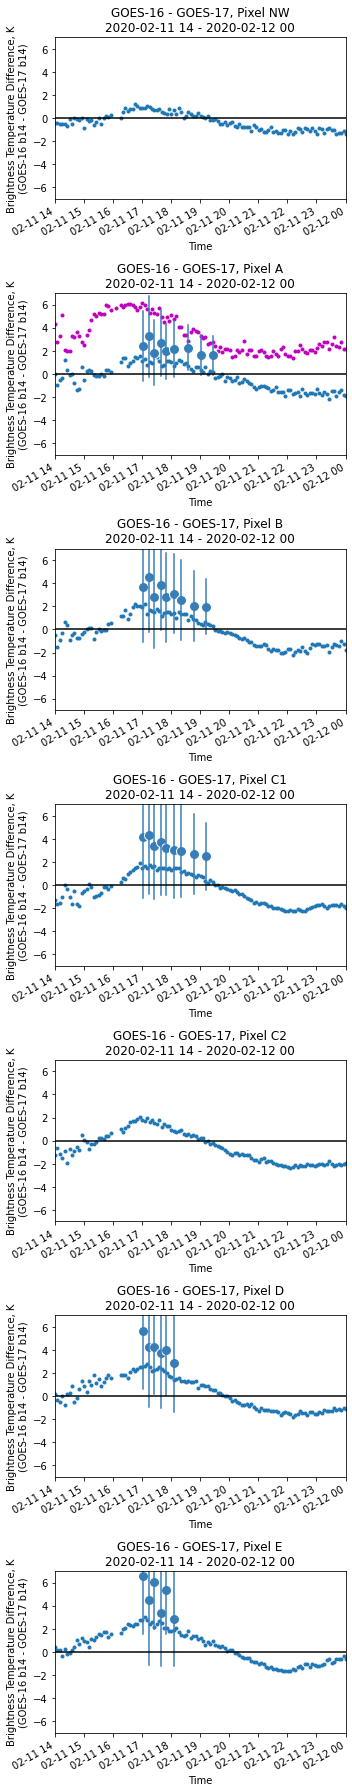

In [40]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=7, ncols= 1, figsize=(5,25), tight_layout=True)

[axNW, axA, axB, axC1, axC2, axD, axE] = axs.ravel()

### Pixel NW

# GOES-16 - GOES-17
#(pixelNW_g16_lst.LST -        pixelNW_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axNW)
#(pixelNW_g16_rad.b13_tb_2km - pixelNW_g17_rad.b13_tb_2km).plot(ax=axNW)
(pixelNW_g16_rad.b14_tb_2km - pixelNW_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axNW)

# GOES-16 Pixel NW
make_diff_over_time_plot(this_ax=axNW, 
                         goesIR_df=pixelNW_g16_rad, 
                         airborneIR_df=pixelNW_airborneIR_g16_feb11, 
                         this_pixel='pixelNW', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')

### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
#(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b14_tb_2km - pixelA_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axA)

# GOES-16 vs snow pit 2S10, pixel A
(pixelA_g16_rad.b14_tb_2km - df_merged.rad_avg).plot(marker='.', c='m', linestyle='none', ax=axA)

# GOES-16 Pixel NW
axA = make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb11, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


### Pixel B

# GOES-16 - GOES-17
#(pixelB_g16_lst.LST -        pixelB_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axB)
#(pixelB_g16_rad.b13_tb_2km - pixelB_g17_rad.b13_tb_2km).plot(ax=axB)
(pixelB_g16_rad.b14_tb_2km - pixelB_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axB)

# GOES-16 Pixel B
make_diff_over_time_plot(this_ax=axB, 
                         goesIR_df=pixelB_g16_rad, 
                         airborneIR_df=pixelB_airborneIR_g16_feb11, 
                         this_pixel='pixelB', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


### Pixel C

# GOES-16 - GOES-17 C1
#(pixelC_g16_lst.LST -        pixelC1_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC1_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b14_tb_2km - pixelC1_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC1)
# GOES-16 - GOES-17 C2
#(pixelC_g16_lst.LST -        pixelC2_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axC)
#(pixelC_g16_rad.b13_tb_2km - pixelC2_g17_rad.b13_tb_2km).plot(ax=axC)
(pixelC_g16_rad.b14_tb_2km - pixelC2_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axC2)

# GOES-16 Pixel C1
make_diff_over_time_plot(this_ax=axC1, 
                         goesIR_df=pixelC_g16_rad, 
                         airborneIR_df=pixelC_airborneIR_g16_feb11, 
                         this_pixel='pixelC', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')

### Pixel D

# GOES-16 - GOES-17
#(pixelD_g16_lst.LST -        pixelD_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axD)
#(pixelD_g16_rad.b13_tb_2km - pixelD_g17_rad.b13_tb_2km).plot(ax=axD)
(pixelD_g16_rad.b14_tb_2km - pixelD_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axD)

# GOES-16 Pixel D
make_diff_over_time_plot(this_ax=axD, 
                         goesIR_df=pixelD_g16_rad, 
                         airborneIR_df=pixelD_airborneIR_g16_feb11, 
                         this_pixel='pixelD', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')




### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
#(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b14_tb_2km - pixelE_g17_rad.b14_tb_2km).plot(marker = '.', linestyle='none', ax=axE)

# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb11, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')

starttime, endtime = '2020-02-11 14', '2020-02-12 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-7,7)
    this_ax.set_ylabel('Brightness Temperature Difference, K\n(GOES-16 b14 - GOES-17 b14)')
    this_ax.set_xlabel('Time')
    
    
axNW.set_title(f'GOES-16 - GOES-17, Pixel NW\n{starttime} - {endtime}')
axA.set_title(f'GOES-16 - GOES-17, Pixel A\n{starttime} - {endtime}')
axB.set_title(f'GOES-16 - GOES-17, Pixel B\n{starttime} - {endtime}')
axC1.set_title(f'GOES-16 - GOES-17, Pixel C1\n{starttime} - {endtime}')
axC2.set_title(f'GOES-16 - GOES-17, Pixel C2\n{starttime} - {endtime}')
axD.set_title(f'GOES-16 - GOES-17, Pixel D\n{starttime} - {endtime}')
axE.set_title(f'GOES-16 - GOES-17, Pixel E\n{starttime} - {endtime}')

---
# ASTER

In [41]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import geopandas as gpd
import xarray as xr
from shapely.geometry import box, mapping
import aster_utils

def tir_dn2rad(DN, band):
    '''Convert AST_L1T Digital Number values to At-Sensor Radiance for the TIR bands (bands 10-14).'''
    ucc = [6.822e-3, 6.780e-3, 6.590e-3, 5.693e-3, 5.225e-3]
    rad = (DN-1.) * ucc[band-10]
    return rad

def tir_rad2tb(rad, band):
    '''Convert AST_L1T At-Sensor Radiance to Brightness Temperature [K] for the TIR bands (bands 10-14).'''
    k1 = [3047.47, 2480.93, 1930.80, 865.65, 649.60]
    k2 = [1736.18, 1666.21, 1584.72,1349.82, 1274.49]
    tb = k2[band-10] /  np.log((k1[band-10]/rad) + 1)
    return tb

In [42]:
aster_l1t_filepath = r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\ASTER\ASTER_L1T_2020_GrandMesa_SnowEx\output\AST_L1T_00302082020180748_20200209065849_17218_ImageData14.tif"
dst_crs = 'EPSG:4326'

new_filepath = aster_utils.reproject_aster_l1t(aster_l1t_filepath, dst_crs = 'EPSG:32613')
print(new_filepath)

C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\ASTER\ASTER_L1T_2020_GrandMesa_SnowEx\output\AST_L1T_00302082020180748_20200209065849_17218_ImageData14_EPSG_32613.tif


In [43]:
# Open ASTER image
aster_b14_DN = xr.open_dataset(new_filepath, engine="rasterio")
aster_b14_DN.rio.write_crs("epsg:32613", inplace=True)
aster_b14_DN = aster_b14_DN.squeeze()

#Convert DN to radiance, then radiance to brightness temperature
# ASTER band number for conversion functions
band_number = 14

# Convert DN to Radiance
aster_b14_rad = tir_dn2rad(aster_b14_DN, band_number)

# Convert Radiance to Brightness Temperature [K]
aster_b14_tb = tir_rad2tb(aster_b14_rad, band_number)

# Open shapefiles
g16_shapefile = gpd.read_file(r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\pixels_GOES-16_ABI.geojson")
g17_shapefile = gpd.read_file(r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\pixels_GOES-17_ABI.geojson")

# Open 500m buffered shapefiles
#g16_shapefile = gpd.read_file(r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\pixels_GOES-16_ABI_500mBuffer.geojson")
#g17_shapefile = gpd.read_file(r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\MountainGOES\Mountain GOES Paper\Paper 2 - satellite vs ground\Paper 2a - snowex data\data\pixels_GOES-17_ABI_500mBuffer.geojson")

In [44]:
#aster_b14_tb.rio.to_raster(r"C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\ASTER\ASTER_L1T_2020_GrandMesa_SnowEx\output\AST_L1T_00302082020180748_20200209065849_17218_ImageData14_tb.tif")

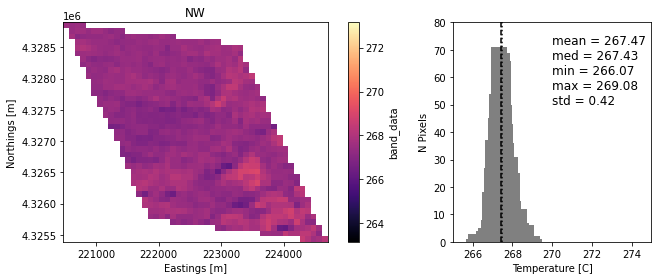

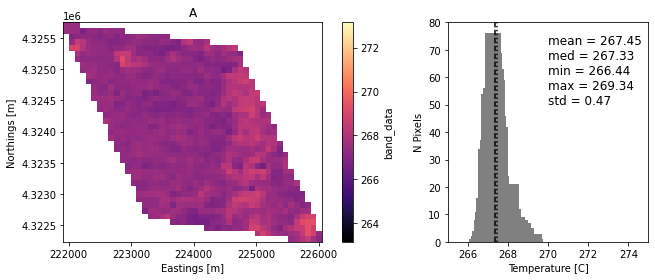

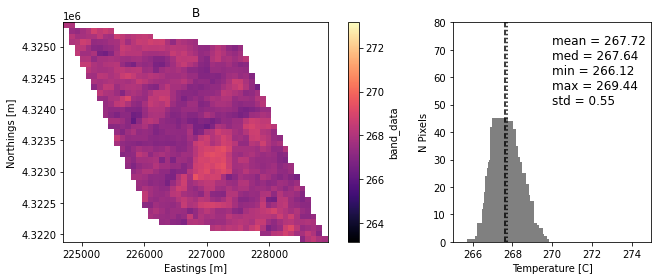

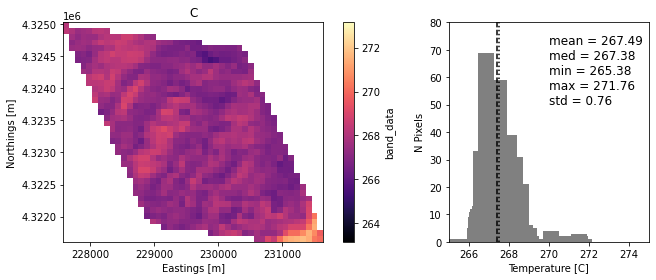

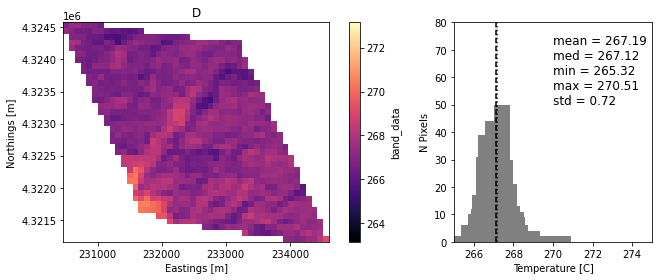

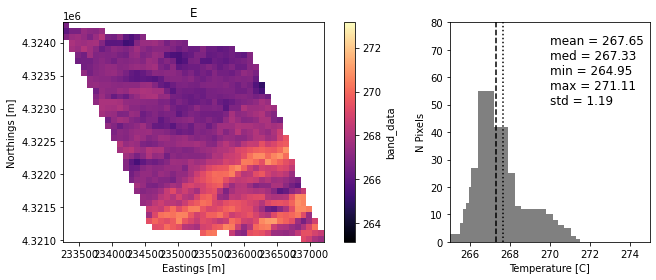

In [45]:
g16px_aster_means = []
g16px_aster_std = []

for i in range(len(g16_shapefile.to_crs('epsg:32613').geometry)):
    cropping_geometries = [g16_shapefile.to_crs('epsg:32613').geometry[i]]
    #geometry = f'''{{"type": "Polygon", "coordinates": [[[{utm_xmin}, {utm_ymax}],[{utm_xmin}, {utm_ymin}],[{utm_xmax}, {utm_ymin}],[{utm_xmax}, {utm_ymax}],[{utm_xmin}, {utm_ymax}]]]}}'''
    #cropping_geometries = [geojson.loads(geometry)]
    shapefile_tb = aster_b14_tb.rio.clip(geometries=cropping_geometries, crs=32613)
    shapefile_tb_K = shapefile_tb.band_data
    shapefile_tb_C = shapefile_tb.band_data - 273.15
    #plt.figure()
    #shapefile_tb_C.plot(cmap='magma')
    
    data = shapefile_tb_K.values

    # remove nans from data
    data = data[~np.isnan(data)]
    
    
    fig, [ax_img, ax_hist] = plt.subplots(nrows=1,ncols=2,figsize=(10,4), tight_layout=True,
                                                  gridspec_kw={'width_ratios': [2, 1]})
    shapefile_tb_K.plot(cmap='magma', vmin=263.15, vmax=273.15, ax=ax_img)
    ax_img.set_aspect('equal', 'box')
    ax_img.set_ylabel('Northings [m]')
    ax_img.set_xlabel('Eastings [m]')
    ax_img.set_title(g16_shapefile.name[i])
    
    
    
    
    y_hist, _ = np.histogram(data, bins=100, density=False)
    x_hist = np.linspace(np.min(data), np.max(data), num=len(y_hist))
    ax_hist.bar(x_hist, y_hist, color='grey')
    ax_hist.axvline(np.median(data),color='k',linestyle='--')
    ax_hist.axvline(np.mean(data),color='k',linestyle=':')
    ax_hist.set_xlim(265, 275)
    ax_hist.set_ylim(0,80)
    ax_hist.set_ylabel('N Pixels')
    ax_hist.set_xlabel('Temperature [C]')
    g16px_aster_means.append(np.mean(data))
    g16px_aster_std.append(np.std(data))
    s1 = str(np.round(np.mean(data),2))
    s2 = str(np.round(np.median(data),2))
    s3 = str(np.round(np.min(data),2))
    s4 = str(np.round(np.max(data),2))
    s5 = str(np.round(np.std(data),2))
    ax_hist.text(270, 50, f'mean = {s1}\nmed = {s2}\nmin = {s3}\nmax = {s4}\nstd = {s5}', fontsize=12)
    
    aster_mesa_west_mean_TC = np.mean(data)
    aster_mesa_west_median_TC = np.median(data)

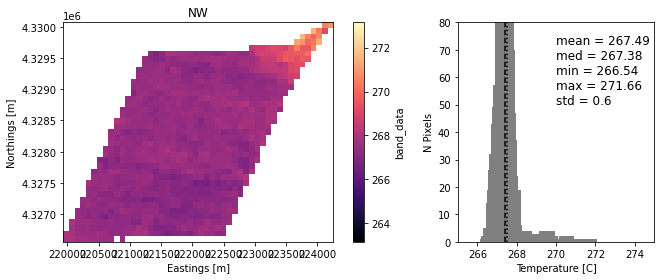

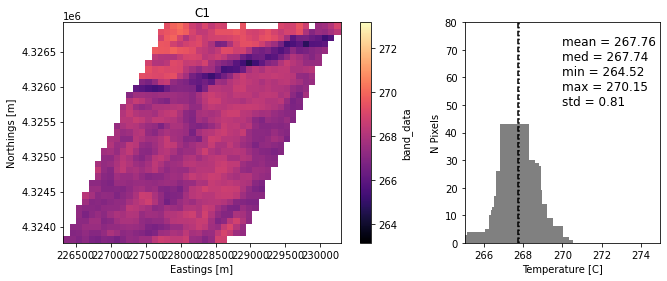

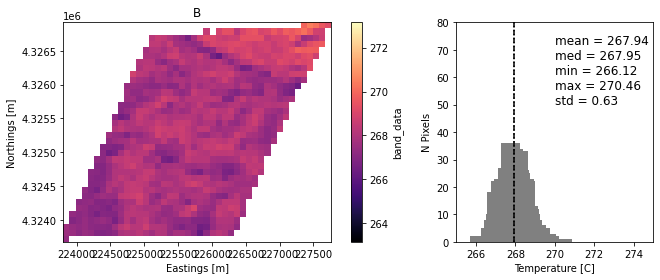

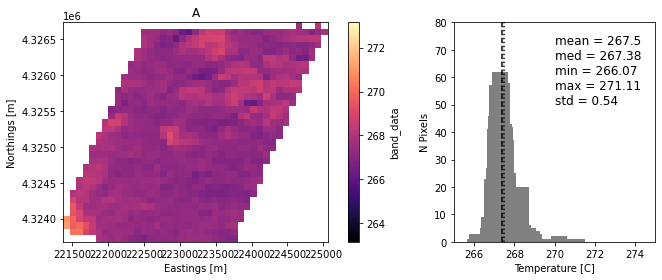

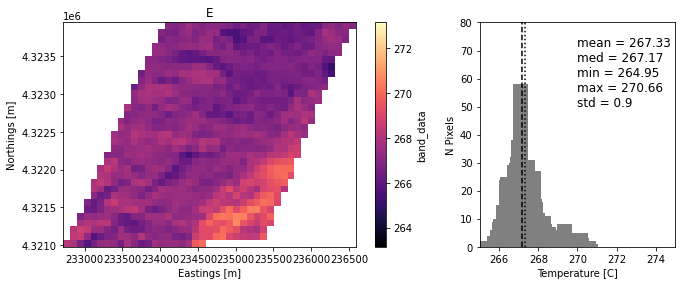

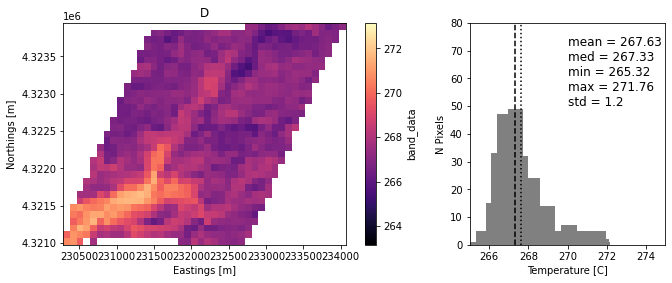

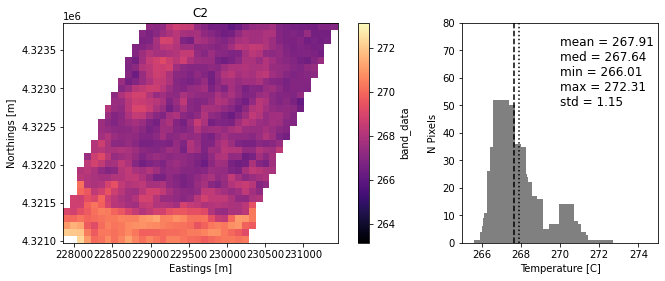

In [46]:
g17px_aster_means = []
g17px_aster_std = []

for i in range(len(g17_shapefile.to_crs('epsg:32613').geometry)):
    cropping_geometries = [g17_shapefile.to_crs('epsg:32613').geometry[i]]
    #geometry = f'''{{"type": "Polygon", "coordinates": [[[{utm_xmin}, {utm_ymax}],[{utm_xmin}, {utm_ymin}],[{utm_xmax}, {utm_ymin}],[{utm_xmax}, {utm_ymax}],[{utm_xmin}, {utm_ymax}]]]}}'''
    #cropping_geometries = [geojson.loads(geometry)]
    shapefile_tb = aster_b14_tb.rio.clip(geometries=cropping_geometries, crs=32613)
    shapefile_tb_K = shapefile_tb.band_data
    shapefile_tb_C = shapefile_tb.band_data - 273.15
    #plt.figure()
    #shapefile_tb_C.plot(cmap='magma')
    
    data = shapefile_tb_K.values

    # remove nans from data
    data = data[~np.isnan(data)]
    
    
    fig, [ax_img, ax_hist] = plt.subplots(nrows=1,ncols=2,figsize=(10,4), tight_layout=True,
                                                  gridspec_kw={'width_ratios': [2, 1]})
    shapefile_tb_K.plot(cmap='magma', vmin=263.15, vmax=273.15, ax=ax_img)
    ax_img.set_aspect('equal', 'box')
    ax_img.set_ylabel('Northings [m]')
    ax_img.set_xlabel('Eastings [m]')
    ax_img.set_title(g17_shapefile.name[i])
    
    
    
    
    y_hist, _ = np.histogram(data, bins=100, density=False)
    x_hist = np.linspace(np.min(data), np.max(data), num=len(y_hist))
    ax_hist.bar(x_hist, y_hist, color='grey')
    ax_hist.axvline(np.median(data),color='k',linestyle='--')
    ax_hist.axvline(np.mean(data),color='k',linestyle=':')
    ax_hist.set_xlim(265, 275)
    ax_hist.set_ylim(0,80)
    ax_hist.set_ylabel('N Pixels')
    ax_hist.set_xlabel('Temperature [C]')
    g17px_aster_means.append(np.mean(data))
    g17px_aster_std.append(np.std(data))
    s1 = str(np.round(np.mean(data),2))
    s2 = str(np.round(np.median(data),2))
    s3 = str(np.round(np.min(data),2))
    s4 = str(np.round(np.max(data),2))
    s5 = str(np.round(np.std(data),2))
    ax_hist.text(270, 50, f'mean = {s1}\nmed = {s2}\nmin = {s3}\nmax = {s4}\nstd = {s5}', fontsize=12)
    
    aster_mesa_west_mean_TC = np.mean(data)
    aster_mesa_west_median_TC = np.median(data)

In [47]:
aster_time = [pd.to_datetime(pd.Timestamp('2020-02-08T18:07:48'))]

plus_minus_minutes = 30



In [48]:
# goes 16 pixel shapefiles order: NW, A, B, C, D, E
g16_pixel_names = ['NW', 'A', 'B', 'C', 'D', 'E']
goes16_lst_values = [get_time_window_stats(pixelNW_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelA_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelB_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelD_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelE_g16_lst, 'LST', aster_time, plus_minus_minutes)[0][0]]

goes16_tb_values = [get_time_window_stats(pixelNW_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelA_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelB_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelD_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelE_g16_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0]]

# goes 17 pixel shapefiles order: NW, C1, B, A, E, D, C2
g17_pixel_names = ['NW', 'C1', 'B', 'A', 'E', 'D', 'C2']
goes17_lst_values = [get_time_window_stats(pixelNW_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC1_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelB_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelA_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelE_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelD_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC2_g17_lst, 'LST', aster_time, plus_minus_minutes)[0][0]]

goes17_tb_values = [get_time_window_stats(pixelNW_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC1_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelB_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelA_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelE_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelD_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0],
                     get_time_window_stats(pixelC2_g17_rad, 'b14_tb_2km', aster_time, plus_minus_minutes)[0][0]]

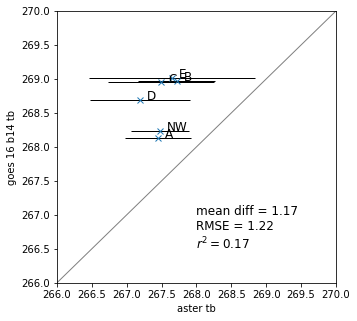

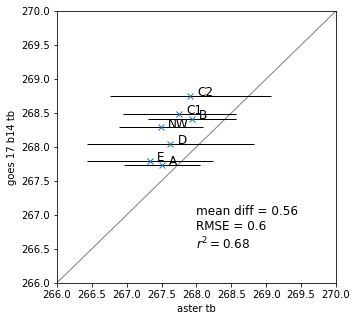

In [49]:
min_ax,max_ax = 266,270
text_x, text_y = 268, 266.5

# GOES-16
plt.figure(figsize=(5,5))
plt.plot(g16px_aster_means, goes16_tb_values, 'x')
plt.errorbar(g16px_aster_means, goes16_tb_values,
             xerr=g16px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)



plt.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

plt.xlim(min_ax,max_ax)
plt.ylim(min_ax,max_ax)

plt.ylabel('goes 16 b14 tb')
plt.xlabel('aster tb')

stats_dict = summary_stats(np.array(g16px_aster_means), np.array(goes16_tb_values))
s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
plt.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)


for i in range(len(g16px_aster_means)):
    plt.text(g16px_aster_means[i]+0.1, goes16_tb_values[i], g16_pixel_names[i], fontsize=12)


# GOES 17
plt.figure(figsize=(5,5))

plt.plot(g17px_aster_means, goes17_tb_values, 'x')
plt.errorbar(g17px_aster_means, goes17_tb_values,
             xerr=g17px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)


plt.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

plt.xlim(min_ax,max_ax)
plt.ylim(min_ax,max_ax)

plt.ylabel('goes 17 b14 tb')
plt.xlabel('aster tb')

stats_dict = summary_stats(np.array(g17px_aster_means), np.array(goes17_tb_values))
s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
plt.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

for i in range(len(g17px_aster_means)):
    plt.text(g17px_aster_means[i]+0.1, goes17_tb_values[i], g17_pixel_names[i], fontsize=12)

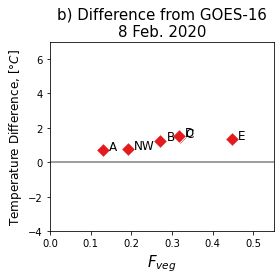

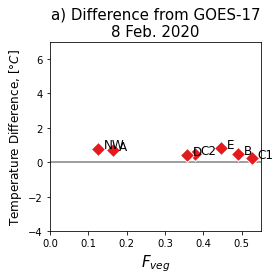

In [50]:
g17_pixel_names2 = ['NW', 'A', 'B', 'C1', 'C2', 'D', 'E']

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
ax.plot(tcc20_mean_g16, np.array(goes16_tb_values) - np.array(g16px_aster_means), linestyle='none', marker='D', markerfacecolor='#e41a1c', markeredgecolor='w', markersize=10, alpha=1)
#ax.errorbar(tcc20_mean_g16, np.array(goes16_tb_values) - np.array(g16px_aster_means),
#             yerr=g16px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)
for i in range(len(tcc20_mean_g16)):
    plt.text(tcc20_mean_g16[i]+0.015, np.array(goes16_tb_values)[i] - np.array(g16px_aster_means)[i], g16_pixel_names[i], fontsize=12)
ax.set_title('b) Difference from GOES-16\n8 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11b_aster.svg')

fig, ax = plt.subplots(figsize=(4,4), tight_layout=True)
ax.plot(tcc20_mean_g17, np.array(goes17_tb_values) - np.array(g17px_aster_means), linestyle='none', marker='D', markerfacecolor='#e41a1c', markeredgecolor='w', markersize=10, alpha=1)
#ax.errorbar(tcc20_mean_g17, np.array(goes17_tb_values) - np.array(g17px_aster_means),
#             yerr=g17px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)
for i in range(len(tcc20_mean_g17)):
    plt.text(tcc20_mean_g17[i]+0.015, np.array(goes17_tb_values)[i] - np.array(g17px_aster_means)[i], g17_pixel_names2[i], fontsize=12)
ax.set_title('a) Difference from GOES-17\n8 Feb. 2020', fontsize=15)
ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
ax.set_xlabel('$F_{veg}$', fontsize=15)
ax.axhline(0,linestyle='-',color='k', alpha=0.5, zorder=-999)
ax.set_xlim(0,0.55)
ax.set_ylim(-4,7)
plt.savefig('figure11a_aster.svg')

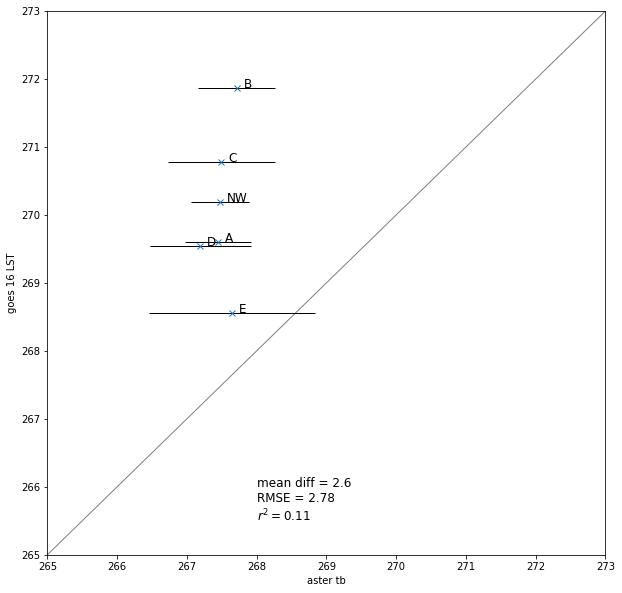

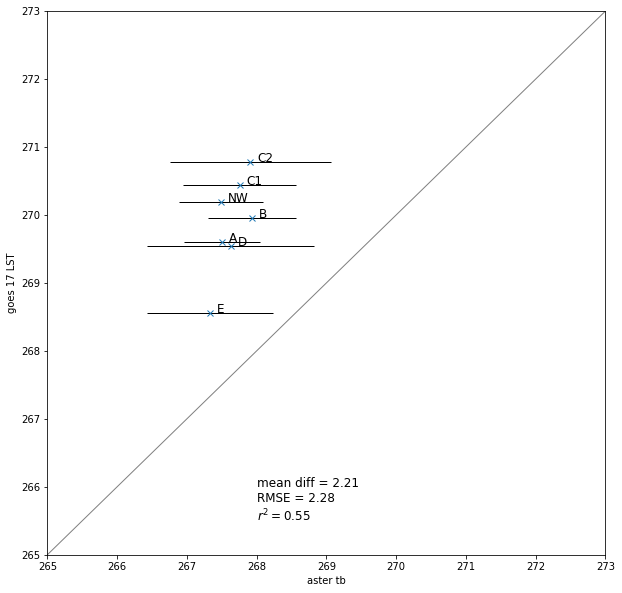

In [51]:
min_ax,max_ax = 265,273
text_x, text_y = 268, 265.5

# GOES-16
plt.figure(figsize=(10,10))
plt.plot(g16px_aster_means, goes16_lst_values, 'x')
plt.errorbar(g16px_aster_means, goes16_lst_values,
             xerr=g16px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)



plt.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

plt.xlim(min_ax,max_ax)
plt.ylim(min_ax,max_ax)

plt.ylabel('goes 16 LST')
plt.xlabel('aster tb')


stats_dict = summary_stats(np.array(g16px_aster_means), np.array(goes16_lst_values))
s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
plt.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)

for i in range(len(g16px_aster_means)):
    plt.text(g16px_aster_means[i]+0.1, goes16_lst_values[i], g16_pixel_names[i], fontsize=12)
    
    
    

# GOES 17
plt.figure(figsize=(10,10))

plt.plot(g17px_aster_means, goes17_lst_values, 'x')
plt.errorbar(g17px_aster_means, goes17_lst_values,
             xerr=g17px_aster_std, linestyle='none', color='k', lw=1, zorder=-98)


plt.plot([min_ax,max_ax],[min_ax,max_ax], 'grey', lw=1, zorder=-99)

plt.xlim(min_ax,max_ax)
plt.ylim(min_ax,max_ax)

plt.ylabel('goes 17 LST')
plt.xlabel('aster tb')


stats_dict = summary_stats(np.array(g17px_aster_means), np.array(goes17_lst_values))
s1 = str(np.round(stats_dict['r_squared'],2))
s2 = str(np.round(stats_dict['mean_diff'],2))
s3 = str(np.round(stats_dict['rms_diff'],2))
plt.text(text_x, text_y, f'mean diff = {s2}\nRMSE = {s3}\n$r^2 = {s1}$', fontsize=12)


for i in range(len(g17px_aster_means)):
    plt.text(g17px_aster_means[i]+0.1, goes17_lst_values[i], g17_pixel_names[i], fontsize=12)

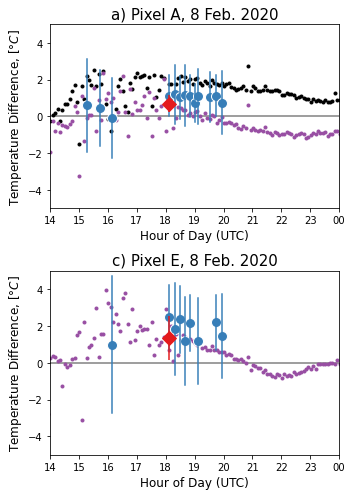

In [52]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=2, ncols= 1, figsize=(5,7), tight_layout=True)

[axA, axE] = axs.ravel()


### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
#(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axA)


# GOES-16 vs snow pit 2S10, pixel A
(pixelA_g16_rad.b13_tb_2km - df_merged.rad_avg).plot(marker='.', c='k', linestyle='none', ax=axA, zorder=-100)

# GOES-16 Pixel A
axA = make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb08, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

aster_time = np.datetime64('2020-02-08T18:07:48')
i=1
axA.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'D', c='#e41a1c', markersize=10)
axA.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', c='#e41a1c')





### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
#(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axE)

# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb08, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b13_tb_2km')

aster_time = np.datetime64('2020-02-08T18:07:48')
i=5
axE.plot(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), 'D', c='#e41a1c', markersize=10)
axE.errorbar(aster_time, np.array(goes16_tb_values[i]) - np.array(g16px_aster_means[i]), yerr=np.array(g16px_aster_std[i]), linestyle='none', c='#e41a1c')

starttime, endtime = '2020-02-08 14', '2020-02-09 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k', alpha=0.5, zorder=-999)
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-5,5)
    this_ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
    this_ax.set_xlabel('Hour of Day (UTC)', fontsize=12)
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    
    
    
axA.set_title(f'a) Pixel A, 8 Feb. 2020', fontsize=15)
axE.set_title(f'c) Pixel E, 8 Feb. 2020', fontsize=15)

plt.savefig('figure9ac.svg')

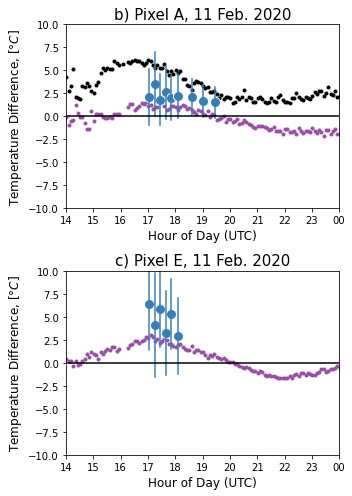

In [53]:
# plot timeseries for one pixel
fig, axs = plt.subplots(nrows=2, ncols= 1, figsize=(5,7), tight_layout=True)

[axA, axE] = axs.ravel()

### Pixel A

# GOES-16 - GOES-17
#(pixelA_g16_lst.LST -        pixelA_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axA)
#(pixelA_g16_rad.b13_tb_2km - pixelA_g17_rad.b13_tb_2km).plot(ax=axA)
(pixelA_g16_rad.b14_tb_2km - pixelA_g17_rad.b14_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axA)

# GOES-16 vs snow pit 2S10, pixel A
(pixelA_g16_rad.b14_tb_2km - df_merged.rad_avg).plot(marker='.', c='k', linestyle='none', ax=axA)

# GOES-16 Pixel NW
axA = make_diff_over_time_plot(this_ax=axA, 
                         goesIR_df=pixelA_g16_rad, 
                         airborneIR_df=pixelA_airborneIR_g16_feb11, 
                         this_pixel='pixelA', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')


### Pixel E

# GOES-16 - GOES-17
#(pixelE_g16_lst.LST -        pixelE_g17_lst.LST).plot(marker = '+', linestyle='none', color='r', ax=axE)
#(pixelE_g16_rad.b13_tb_2km - pixelE_g17_rad.b13_tb_2km).plot(ax=axE)
(pixelE_g16_rad.b14_tb_2km - pixelE_g17_rad.b14_tb_2km).plot(marker = '.', color='#984ea3', linestyle='none', ax=axE)

# GOES-16 Pixel E
make_diff_over_time_plot(this_ax=axE, 
                         goesIR_df=pixelE_g16_rad, 
                         airborneIR_df=pixelE_airborneIR_g16_feb11, 
                         this_pixel='pixelE', 
                         this_goes='g16', 
                         plus_minus_minutes=plus_minus_minutes, 
                         goes_variable_name='b14_tb_2km')

starttime, endtime = '2020-02-11 14', '2020-02-12 00'

# formatting
for this_ax in axs.ravel():
    this_ax.axhline(0, c='k')
    this_ax.set_xlim(pd.Timestamp(starttime), pd.Timestamp(endtime))
    this_ax.set_ylim(-10,10)
    this_ax.set_ylabel('Temperature Difference, [$\degree C$]', fontsize=12)
    this_ax.set_xlabel('Hour of Day (UTC)', fontsize=12)
    # Text in the x-axis will be displayed in 'YYYY-mm' format.
    this_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in this_ax.get_xticklabels(which='major'):
        label.set(rotation=0, horizontalalignment='center')
    
    
    
axA.set_title(f'b) Pixel A, 11 Feb. 2020', fontsize=15)
axE.set_title(f'c) Pixel E, 11 Feb. 2020', fontsize=15)

plt.savefig('figure9bd.svg')